In [2]:
import requests
import datetime
import time
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
import seaborn as sns

Using TensorFlow backend.


In [3]:
fighter1 = pd.read_csv('fighter1.csv')
fighter2 = pd.read_csv('fighter2.csv')

In [4]:
fighter1.drop(columns=['Unnamed: 0'], inplace=True)
fighter2.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
fighter1.drop_duplicates()

fight        date           fighter_1  \
0             Fabricio Werdum vs Stipe Miocic  2016-05-14        Stipe-Miocic   
1            Nordine Taleb vs Muslim Salikhov  2019-09-07     Muslim-Salikhov   
2                 Justin Salas vs Aaron Riley  2013-07-27        Justin-Salas   
3                   Ed Herman vs Rafael Natal  2014-05-10           Ed-Herman   
4               Andre Fili vs Godofredo Pepey  2015-03-21     Godofredo-Pepey   
5               Sean O'Connell vs Ilir Latifi  2016-01-17         Ilir-Latifi   
6                  Dongi Yang vs Jake Collier  2015-11-28          Dongi-Yang   
7                 Miesha Tate vs Amanda Nunes  2016-07-09        Amanda-Nunes   
8                 Sam Sicilia vs Yaotzin Meza  2015-07-15         Sam-Sicilia   
9             Edson Barboza vs Justin Gaethje  2019-03-30      Justin-Gaethje   
10               Edson Barboza vs Paul Felder  2015-07-25       Edson-Barboza   
11          Tamdan McCrory vs Krzysztof Jotko  2016-06-18     Krzysztof-Jotko   
12                Jordan Mein vs Thiago Alves  2015-01-31        Thiago-Alves   
13       Amanda Nunes vs Valentina Shevchenko  2017-09-09        Amanda-Nunes   
14              Tom Breese vs Sean Strickland  2016-06-04     Sean-Strickland   
15         Bryan Barberena vs Colby Covington  2016-12-17     Colby-Covington   
16            Yoel Romero vs Robert Whittaker  2018-06-09    Robert-Whittaker   
17               Zak Cummings vs Trevin Giles  2019-05-18        Zak-Cummings   
18    Jocelyn Jones-Lybarger vs Nina Ansaroff  2017-01-15       Nina-Ansaroff   
19             Johny Hendricks vs Tim Boetsch  2017-06-25         Tim-Boetsch   
20        Demetrious Johnson vs Chris Cariaso  2014-09-27  Demetrious-Johnson   
21           Fabricio Werdum vs Travis Browne  2014-04-19     Fabricio-Werdum   
22             Rose Namajunas vs Tecia Torres  2016-04-16      Rose-Namajunas   
24              Ross Pearson vs Mizuto Hirota  2018-02-10        Ross-Pearson   
25               Cub Swanson vs Frankie Edgar  2018-04-21       Frankie-Edgar   
26         Francisco Trinaldo vs Ross Pearson  2016-01-17  Francisco-Trinaldo   
27           Joseph Benavidez vs Dustin Ortiz  2019-01-19    Joseph-Benavidez   
28                Jon Jones vs Daniel Cormier  2015-01-03           Jon-Jones   
29               Hector Lombard vs Neil Magny  2016-03-19          Neil-Magny   
30                Jorge Masvidal vs Pat Healy  2014-04-19      Jorge-Masvidal   
...                                       ...         ...                 ...   
1521                Alan Jouban vs Mike Perry  2016-12-17          Mike-Perry   
1522            Islam Makhachev vs Davi Ramos  2019-09-07          Davi-Ramos   
1523              Matt Brown vs Diego Sanchez  2017-11-11       Diego-Sanchez   
1524      Charles Oliveira vs Christos Giagos  2018-09-22     Christos-Giagos   
1525          Thales Leites vs Hector Lombard  2018-09-22      Hector-Lombard   
1526           Luke Rockhold vs Lyoto Machida  2015-04-18       Lyoto-Machida   
1527          Viktor Pesta vs Aleksei Oleinik  2017-01-15        Viktor-Pesta   
1528     Garreth McLellan vs Magnus Cedenblad  2016-05-08    Garreth-McLellan   
1529         Alexandra Albu vs Emily Whitmire  2019-02-17      Alexandra-Albu   
1530            Bryan Caraway vs Cody Stamann  2018-03-03       Bryan-Caraway   
1531          Donald Cerrone vs Alex Oliveira  2016-02-21       Alex-Oliveira   
1534       Gabriel Benitez vs Enrique Barzola  2017-05-13     Gabriel-Benitez   
1535  Alexander Gustafsson vs Glover Teixeira  2017-05-28     Glover-Teixeira   
1536       Kelvin Gastelum vs Israel Adesanya  2019-04-13     Kelvin-Gastelum   
1537              Sara McMann vs Amanda Nunes  2015-08-08         Sara-McMann   
1538      Aljamain Sterling vs Johnny Eduardo  2015-12-10      Johnny-Eduardo   
1539      Alessio Di Chirico vs Kevin Holland  2019-06-22  Alessio-Di-Chirico   
1540         Donald Cerrone vs Yancy Medeiros  2018-02-18      Yancy-Me

In [6]:
fighter1

fight        date           fighter_1  \
0             Fabricio Werdum vs Stipe Miocic  2016-05-14        Stipe-Miocic   
1            Nordine Taleb vs Muslim Salikhov  2019-09-07     Muslim-Salikhov   
2                 Justin Salas vs Aaron Riley  2013-07-27        Justin-Salas   
3                   Ed Herman vs Rafael Natal  2014-05-10           Ed-Herman   
4               Andre Fili vs Godofredo Pepey  2015-03-21     Godofredo-Pepey   
5               Sean O'Connell vs Ilir Latifi  2016-01-17         Ilir-Latifi   
6                  Dongi Yang vs Jake Collier  2015-11-28          Dongi-Yang   
7                 Miesha Tate vs Amanda Nunes  2016-07-09        Amanda-Nunes   
8                 Sam Sicilia vs Yaotzin Meza  2015-07-15         Sam-Sicilia   
9             Edson Barboza vs Justin Gaethje  2019-03-30      Justin-Gaethje   
10               Edson Barboza vs Paul Felder  2015-07-25       Edson-Barboza   
11          Tamdan McCrory vs Krzysztof Jotko  2016-06-18     Krzysztof-Jotko   
12                Jordan Mein vs Thiago Alves  2015-01-31        Thiago-Alves   
13       Amanda Nunes vs Valentina Shevchenko  2017-09-09        Amanda-Nunes   
14              Tom Breese vs Sean Strickland  2016-06-04     Sean-Strickland   
15         Bryan Barberena vs Colby Covington  2016-12-17     Colby-Covington   
16            Yoel Romero vs Robert Whittaker  2018-06-09    Robert-Whittaker   
17               Zak Cummings vs Trevin Giles  2019-05-18        Zak-Cummings   
18    Jocelyn Jones-Lybarger vs Nina Ansaroff  2017-01-15       Nina-Ansaroff   
19             Johny Hendricks vs Tim Boetsch  2017-06-25         Tim-Boetsch   
20        Demetrious Johnson vs Chris Cariaso  2014-09-27  Demetrious-Johnson   
21           Fabricio Werdum vs Travis Browne  2014-04-19     Fabricio-Werdum   
22             Rose Namajunas vs Tecia Torres  2016-04-16      Rose-Namajunas   
23           Fabricio Werdum vs Travis Browne  2014-04-19     Fabricio-Werdum   
24              Ross Pearson vs Mizuto Hirota  2018-02-10        Ross-Pearson   
25               Cub Swanson vs Frankie Edgar  2018-04-21       Frankie-Edgar   
26         Francisco Trinaldo vs Ross Pearson  2016-01-17  Francisco-Trinaldo   
27           Joseph Benavidez vs Dustin Ortiz  2019-01-19    Joseph-Benavidez   
28                Jon Jones vs Daniel Cormier  2015-01-03           Jon-Jones   
29               Hector Lombard vs Neil Magny  2016-03-19          Neil-Magny   
...                                       ...         ...                 ...   
1525          Thales Leites vs Hector Lombard  2018-09-22      Hector-Lombard   
1526           Luke Rockhold vs Lyoto Machida  2015-04-18       Lyoto-Machida   
1527          Viktor Pesta vs Aleksei Oleinik  2017-01-15        Viktor-Pesta   
1528     Garreth McLellan vs Magnus Cedenblad  2016-05-08    Garreth-McLellan   
1529         Alexandra Albu vs Emily Whitmire  2019-02-17      Alexandra-Albu   
1530            Bryan Caraway vs Cody Stamann  2018-03-03       Bryan-Caraway   
1531          Donald Cerrone vs Alex Oliveira  2016-02-21       Alex-Oliveira   
1532          Robbie Lawler vs Rory MacDonald  2015-07-11      Rory-MacDonald   
1533         Joseph Benavidez vs Dustin Ortiz  2019-01-19        Dustin-Ortiz   
1534       Gabriel Benitez vs Enrique Barzola  2017-05-13     Gabriel-Benitez   
1535  Alexander Gustafsson vs Glover Teixeira  2017-05-28     Glover-Teixeira   
1536       Kelvin Gastelum vs Israel Adesanya  2019-04-13     Kelvin-Gastelum   
1537              Sara McMann vs Amanda Nunes  2015-08-08         Sara-McMann   
1538      Aljamain Sterling vs Johnny Eduardo  2015-12-10      Johnny-Eduardo   
1539      Alessio Di Chirico vs Kevin Holland  2019-06-22  Alessio-Di-Chirico   
1540         Donald Cerrone vs Yancy Medeiros  2018-02-18      Yancy-Medeiros   
1541            Sergio Pettis vs Yaotzin Meza  2014-06-07        Yaotzin-Meza   
1542          Marc Diakiese vs Teemu Packalen  2017-03-18      Teemu-Pa

In [7]:
fighter1[fighter1['fight'] == 'Yoel Romero vs Robert Whittaker']

fight        date         fighter_1  \
16    Yoel Romero vs Robert Whittaker  2018-06-09  Robert-Whittaker   
50    Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
53    Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
75    Yoel Romero vs Robert Whittaker  2018-06-09  Robert-Whittaker   
114   Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
128   Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
132   Yoel Romero vs Robert Whittaker  2018-06-09  Robert-Whittaker   
157   Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
294   Yoel Romero vs Robert Whittaker  2018-06-09  Robert-Whittaker   
339   Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
450   Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
509   Yoel Romero vs Robert Whittaker  2018-06-09  Robert-Whittaker   
572   Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
634   Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
640   Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
710   Yoel Romero vs Robert Whittaker  2018-06-09  Robert-Whittaker   
811   Yoel Romero vs Robert Whittaker  2017-07-08       Yoel-Romero   
843   Yoel Romero vs Robert Whittaker  2017-07-08       Yoel-Romero   
847   Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   
857   Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   
859   Yoel Romero vs Robert Whittaker  2017-07-08       Yoel-Romero   
865   Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   
944   Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   
967   Yoel Romero vs Robert Whittaker  2017-07-08       Yoel-Romero   
972   Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   
985   Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   
991   Yoel Romero vs Robert Whittaker  2017-07-08       Yoel-Romero   
1140  Yoel Romero vs Robert Whittaker  2017-07-08       Yoel-Romero   
1344  Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   
1360  Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   
1454  Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   
1549  Yoel Romero vs Robert Whittaker  2018-06-09       Yoel-Romero   

      cumultime_1  cumulStr_Att_fighter_1  cumulStr_Att_oponent_1  \
16      63.433333                  1322.0                  1530.0   
50      54.433333                  1215.0                  1309.0   
53      54.433333                  1215.0                  1309.0   
75      63.433333                  1322.0                  1530.0   
114     54.433333                  1215.0                  1309.0   
128     54.433333                  1215.0                  1309.0   
132     63.433333                  1322.0                  1530.0   
157     54.433333                  1215.0                  1309.0   
294     63.433333                  1322.0                  1530.0   
339     54.433333                  1215.0                  1309.0   
450     54.433333                  1215.0                  1309.0   
509     63.433333                  1322.0                  1530.0   
572     54.433333                  1215.0                  1309.0   
634     54.433333                  1215.0                  1309.0   
640     54.433333                  1215.0                  1309.0   
710     63.433333                  1322.0                  1530.0   
811     33.566667                   506.0                   540.0   
843     33.566667                   506.0                   540.0   
847     46.366667                   819.0                   766.0   
857     46.366667                   819.0                   766.0   
859     33.566667                   506.0                   540.0   
865     46.366667                   819.0                   766.0   
944     46.366667                   819.0                   766.0   
967     33.566667               

In [12]:
f2_ = fighter2.drop_duplicates(subset=['fight', 'date'])

In [18]:
f2_[f2_['fighter_2'] == 'Robert-Whittaker']

fight        date         fighter_2  \
1007  Robert Whittaker vs Derek Brunson  2016-11-26  Robert-Whittaker   
1023   Brad Tavares vs Robert Whittaker  2015-05-09  Robert-Whittaker   

      cumultime_2  cumulStr_Att_fighter_2  cumulStr_Att_oponent_2  \
1007    45.850000                  1121.0                  1157.0   
1023    31.116667                   844.0                   862.0   

      cumulTD_Att_fighter_2  cumulTD_Att_oponent_2    KDPM_2  KDPM_ratio_2  \
1007                   10.0                   25.0  0.028848      0.010905   
1023                    9.0                   19.0  0.042508      0.016069   

        SLPM_2  SLPM_ratio_2    SAPM_2  SAPM_ratio_2  Str_Acc_2  Str_Def_2  \
1007  1.869557      0.221125  1.997930      0.285084   0.003222   0.004512   
1023  2.051925      0.251680  1.913449      0.189146   0.002774   0.004469   

      TD_Acc_2  TD_Def_2   SubPM_2  PassPM_2   RevPM_2  Head_SLPM_2  \
1007  0.150000  0.207000  0.008128  0.014852  0.003116     1.220163   
1023  0.166667  0.193421  0.011977  0.021885  0.000000     1.485705   

      Body_SLPM_2  Leg_SLPM_2  Dist_SLPM_2  Clinch_SLPM_2  Ground_SLPM_2  \
1007     0.259396    0.389999     1.532704       0.187967       0.148885   
1023     0.290396    0.275824     1.606078       0.249421       0.196426   

      wins_2  losses_2  implied_prob_2  prev_2  height_2  weight_2  reach_2  \
1007       7         2        0.444444       9      72.0     185.0     73.0   
1023       4         2        0.429185       6      72.0     185.0     73.0   

      stance_Orthodox_2  stance_Southpaw_2  stance_Switch_2  winner  
1007                  1                  0                0       2  
1023                  1                  0                0       2

In [19]:
f1_ = fighter1.drop_duplicates(subset=['fight', 'date'])

In [22]:
f1_[f1_['fighter_1'] == 'Robert-Whittaker']

fight        date         fighter_1  \
16       Yoel Romero vs Robert Whittaker  2018-06-09  Robert-Whittaker   
50       Yoel Romero vs Robert Whittaker  2017-07-08  Robert-Whittaker   
695     Robert Whittaker vs Rafael Natal  2016-04-23  Robert-Whittaker   
878  Robert Whittaker vs Israel Adesanya  2019-10-05  Robert-Whittaker   

     cumultime_1  cumulStr_Att_fighter_1  cumulStr_Att_oponent_1  \
16     63.433333                  1322.0                  1530.0   
50     54.433333                  1215.0                  1309.0   
695    38.850000                   945.0                  1020.0   
878    72.433333                  1648.0                  1770.0   

     cumulTD_Att_fighter_1  cumulTD_Att_oponent_1    KDPM_1  KDPM_ratio_1  \
16                    31.0                   28.0  0.024681      0.007882   
50                    13.0                   28.0  0.028762      0.009186   
695                   10.0                   21.0  0.034046      0.012870   
878                   32.0                   38.0  0.021615      0.006903   

       SLPM_1  SLPM_ratio_1    SAPM_1  SAPM_ratio_1  Str_Acc_1  Str_Def_1  \
16   1.593541      0.200016  1.840612      0.335780   0.003691   0.004531   
50   1.759038      0.221170  1.993887      0.362976   0.003646   0.004788   
695  1.879148      0.224018  2.129934      0.318520   0.003286   0.004581   
878  1.591890      0.191084  1.782183      0.306031   0.003199   0.004220   

     TD_Acc_1  TD_Def_1   SubPM_1  PassPM_1   RevPM_1  Head_SLPM_1  \
16   0.066308  0.220536  0.005875  0.014265  0.002252     1.053033   
50   0.141026  0.220536  0.006846  0.016623  0.002624     1.186317   
695  0.150000  0.198810  0.009593  0.017528  0.003677     1.252477   
878  0.064236  0.180921  0.005145  0.012492  0.001972     1.009628   

     Body_SLPM_1  Leg_SLPM_1  Dist_SLPM_1  Clinch_SLPM_1  Ground_SLPM_1  \
16      0.226759    0.313749     1.277430       0.178513       0.137598   
50      0.239757    0.332964     1.404949       0.201905       0.152184   
695     0.269362    0.357309     1.503664       0.214481       0.161003   
878     0.233865    0.348396     1.301250       0.170138       0.120502   

     wins_1  losses_1  implied_prob_1  prev_1  height_1  weight_1  reach_1  \
16       10         2        0.523560      12      72.0     185.0     73.0   
50        9         2        0.523560      11      72.0     185.0     73.0   
695       6         2        0.740741       8      72.0     185.0     73.0   
878      11         2        0.469484      13      72.0     185.0     73.0   

     stance_Orthodox_1  stance_Southpaw_1  stance_Switch_1  winner  
16                   1                  0                0       1  
50                   1                  0                0       1  
695                  1                  0                0       1  
878                  1                  0                0       2

In [23]:
## was just checking the odds to make sure they are correct - still unsure why a few fights were duplicated
## seems that some were rematches

In [25]:
f1_

fight        date           fighter_1  \
0             Fabricio Werdum vs Stipe Miocic  2016-05-14        Stipe-Miocic   
1            Nordine Taleb vs Muslim Salikhov  2019-09-07     Muslim-Salikhov   
2                 Justin Salas vs Aaron Riley  2013-07-27        Justin-Salas   
3                   Ed Herman vs Rafael Natal  2014-05-10           Ed-Herman   
4               Andre Fili vs Godofredo Pepey  2015-03-21     Godofredo-Pepey   
5               Sean O'Connell vs Ilir Latifi  2016-01-17         Ilir-Latifi   
6                  Dongi Yang vs Jake Collier  2015-11-28          Dongi-Yang   
7                 Miesha Tate vs Amanda Nunes  2016-07-09        Amanda-Nunes   
8                 Sam Sicilia vs Yaotzin Meza  2015-07-15         Sam-Sicilia   
9             Edson Barboza vs Justin Gaethje  2019-03-30      Justin-Gaethje   
10               Edson Barboza vs Paul Felder  2015-07-25       Edson-Barboza   
11          Tamdan McCrory vs Krzysztof Jotko  2016-06-18     Krzysztof-Jotko   
12                Jordan Mein vs Thiago Alves  2015-01-31        Thiago-Alves   
13       Amanda Nunes vs Valentina Shevchenko  2017-09-09        Amanda-Nunes   
14              Tom Breese vs Sean Strickland  2016-06-04     Sean-Strickland   
15         Bryan Barberena vs Colby Covington  2016-12-17     Colby-Covington   
16            Yoel Romero vs Robert Whittaker  2018-06-09    Robert-Whittaker   
17               Zak Cummings vs Trevin Giles  2019-05-18        Zak-Cummings   
18    Jocelyn Jones-Lybarger vs Nina Ansaroff  2017-01-15       Nina-Ansaroff   
19             Johny Hendricks vs Tim Boetsch  2017-06-25         Tim-Boetsch   
20        Demetrious Johnson vs Chris Cariaso  2014-09-27  Demetrious-Johnson   
21           Fabricio Werdum vs Travis Browne  2014-04-19     Fabricio-Werdum   
22             Rose Namajunas vs Tecia Torres  2016-04-16      Rose-Namajunas   
24              Ross Pearson vs Mizuto Hirota  2018-02-10        Ross-Pearson   
25               Cub Swanson vs Frankie Edgar  2018-04-21       Frankie-Edgar   
26         Francisco Trinaldo vs Ross Pearson  2016-01-17  Francisco-Trinaldo   
27           Joseph Benavidez vs Dustin Ortiz  2019-01-19    Joseph-Benavidez   
28                Jon Jones vs Daniel Cormier  2015-01-03           Jon-Jones   
29               Hector Lombard vs Neil Magny  2016-03-19          Neil-Magny   
30                Jorge Masvidal vs Pat Healy  2014-04-19      Jorge-Masvidal   
...                                       ...         ...                 ...   
1521                Alan Jouban vs Mike Perry  2016-12-17          Mike-Perry   
1522            Islam Makhachev vs Davi Ramos  2019-09-07          Davi-Ramos   
1523              Matt Brown vs Diego Sanchez  2017-11-11       Diego-Sanchez   
1524      Charles Oliveira vs Christos Giagos  2018-09-22     Christos-Giagos   
1525          Thales Leites vs Hector Lombard  2018-09-22      Hector-Lombard   
1526           Luke Rockhold vs Lyoto Machida  2015-04-18       Lyoto-Machida   
1527          Viktor Pesta vs Aleksei Oleinik  2017-01-15        Viktor-Pesta   
1528     Garreth McLellan vs Magnus Cedenblad  2016-05-08    Garreth-McLellan   
1529         Alexandra Albu vs Emily Whitmire  2019-02-17      Alexandra-Albu   
1530            Bryan Caraway vs Cody Stamann  2018-03-03       Bryan-Caraway   
1531          Donald Cerrone vs Alex Oliveira  2016-02-21       Alex-Oliveira   
1534       Gabriel Benitez vs Enrique Barzola  2017-05-13     Gabriel-Benitez   
1535  Alexander Gustafsson vs Glover Teixeira  2017-05-28     Glover-Teixeira   
1536       Kelvin Gastelum vs Israel Adesanya  2019-04-13     Kelvin-Gastelum   
1537              Sara McMann vs Amanda Nunes  2015-08-08         Sara-McMann   
1538      Aljamain Sterling vs Johnny Eduardo  2015-12-10      Johnny-Eduardo   
1539      Alessio Di Chirico vs Kevin Holland  2019-06-22  Alessio-Di-Chirico   
1540         Donald Cerrone vs Yancy Medeiros  2018-02-18      Yancy-Me

In [26]:
f2_

fight        date  \
0             Fabricio Werdum vs Stipe Miocic  2016-05-14   
1            Nordine Taleb vs Muslim Salikhov  2019-09-07   
2                 Justin Salas vs Aaron Riley  2013-07-27   
3                   Ed Herman vs Rafael Natal  2014-05-10   
4               Andre Fili vs Godofredo Pepey  2015-03-21   
5               Sean O'Connell vs Ilir Latifi  2016-01-17   
6                  Dongi Yang vs Jake Collier  2015-11-28   
7                 Miesha Tate vs Amanda Nunes  2016-07-09   
8                 Sam Sicilia vs Yaotzin Meza  2015-07-15   
9             Edson Barboza vs Justin Gaethje  2019-03-30   
10               Edson Barboza vs Paul Felder  2015-07-25   
11          Tamdan McCrory vs Krzysztof Jotko  2016-06-18   
12                Jordan Mein vs Thiago Alves  2015-01-31   
13       Amanda Nunes vs Valentina Shevchenko  2017-09-09   
14              Tom Breese vs Sean Strickland  2016-06-04   
15         Bryan Barberena vs Colby Covington  2016-12-17   
16            Yoel Romero vs Robert Whittaker  2018-06-09   
17               Zak Cummings vs Trevin Giles  2019-05-18   
18    Jocelyn Jones-Lybarger vs Nina Ansaroff  2017-01-15   
19             Johny Hendricks vs Tim Boetsch  2017-06-25   
20        Demetrious Johnson vs Chris Cariaso  2014-09-27   
21           Fabricio Werdum vs Travis Browne  2014-04-19   
22             Rose Namajunas vs Tecia Torres  2016-04-16   
24              Ross Pearson vs Mizuto Hirota  2018-02-10   
25               Cub Swanson vs Frankie Edgar  2018-04-21   
26         Francisco Trinaldo vs Ross Pearson  2016-01-17   
27           Joseph Benavidez vs Dustin Ortiz  2019-01-19   
28                Jon Jones vs Daniel Cormier  2015-01-03   
29               Hector Lombard vs Neil Magny  2016-03-19   
30                Jorge Masvidal vs Pat Healy  2014-04-19   
...                                       ...         ...   
1521                Alan Jouban vs Mike Perry  2016-12-17   
1522            Islam Makhachev vs Davi Ramos  2019-09-07   
1523              Matt Brown vs Diego Sanchez  2017-11-11   
1524      Charles Oliveira vs Christos Giagos  2018-09-22   
1525          Thales Leites vs Hector Lombard  2018-09-22   
1526           Luke Rockhold vs Lyoto Machida  2015-04-18   
1527          Viktor Pesta vs Aleksei Oleinik  2017-01-15   
1528     Garreth McLellan vs Magnus Cedenblad  2016-05-08   
1529         Alexandra Albu vs Emily Whitmire  2019-02-17   
1530            Bryan Caraway vs Cody Stamann  2018-03-03   
1531          Donald Cerrone vs Alex Oliveira  2016-02-21   
1534       Gabriel Benitez vs Enrique Barzola  2017-05-13   
1535  Alexander Gustafsson vs Glover Teixeira  2017-05-28   
1536       Kelvin Gastelum vs Israel Adesanya  2019-04-13   
1537              Sara McMann vs Amanda Nunes  2015-08-08   
1538      Aljamain Sterling vs Johnny Eduardo  2015-12-10   
1539      Alessio Di Chirico vs Kevin Holland  2019-06-22   
1540         Donald Cerrone vs Yancy Medeiros  2018-02-18   
1541            Sergio Pettis vs Yaotzin Meza  2014-06-07   
1542          Marc Diakiese vs Teemu Packalen  2017-03-18   
1544           Myles Jury vs Charles Oliveira  2015-12-19   
1545            Marlon Vera vs Guido Cannetti  2018-11-17   
1546               Neil Magny vs Hyun Gyu Lim  2015-05-16   
1547              Phil Davis vs Lyoto Machida  2013-08-03   
1548                 Tim Boetsch vs Ed Herman  2016-01-17   
1550          Stephen Thompson vs Darren Till  2018-05-27   
1551           Jake Ellenberger vs Mike Perry  2017-04-22   
1552           Brandon Davis vs Kyung Ho Kang  2019-08-17   
1553         Paul Felder vs Daron Cruickshank  2016-01-17   
1554     Ismail Naurdiev vs Siyar Bahadurzada  2019-09-28   

                   fighter_2  cumultime_2  cumulStr_Att_fighter_2  \
0            Fabricio-Werdum    48.400000                   778.0   
1              Nordine-Taleb    59.416667                   987.0   
2                Aaron-Riley    37.366667         

In [28]:
real_model_df = pd.merge(f1_, f2_, how='inner', on=['fight', 'date', 'winner'])
real_model_df

fight        date           fighter_1  \
0             Fabricio Werdum vs Stipe Miocic  2016-05-14        Stipe-Miocic   
1            Nordine Taleb vs Muslim Salikhov  2019-09-07     Muslim-Salikhov   
2                 Justin Salas vs Aaron Riley  2013-07-27        Justin-Salas   
3                   Ed Herman vs Rafael Natal  2014-05-10           Ed-Herman   
4               Andre Fili vs Godofredo Pepey  2015-03-21     Godofredo-Pepey   
5               Sean O'Connell vs Ilir Latifi  2016-01-17         Ilir-Latifi   
6                  Dongi Yang vs Jake Collier  2015-11-28          Dongi-Yang   
7                 Miesha Tate vs Amanda Nunes  2016-07-09        Amanda-Nunes   
8                 Sam Sicilia vs Yaotzin Meza  2015-07-15         Sam-Sicilia   
9             Edson Barboza vs Justin Gaethje  2019-03-30      Justin-Gaethje   
10               Edson Barboza vs Paul Felder  2015-07-25       Edson-Barboza   
11          Tamdan McCrory vs Krzysztof Jotko  2016-06-18     Krzysztof-Jotko   
12                Jordan Mein vs Thiago Alves  2015-01-31        Thiago-Alves   
13       Amanda Nunes vs Valentina Shevchenko  2017-09-09        Amanda-Nunes   
14              Tom Breese vs Sean Strickland  2016-06-04     Sean-Strickland   
15         Bryan Barberena vs Colby Covington  2016-12-17     Colby-Covington   
16            Yoel Romero vs Robert Whittaker  2018-06-09    Robert-Whittaker   
17               Zak Cummings vs Trevin Giles  2019-05-18        Zak-Cummings   
18    Jocelyn Jones-Lybarger vs Nina Ansaroff  2017-01-15       Nina-Ansaroff   
19             Johny Hendricks vs Tim Boetsch  2017-06-25         Tim-Boetsch   
20        Demetrious Johnson vs Chris Cariaso  2014-09-27  Demetrious-Johnson   
21           Fabricio Werdum vs Travis Browne  2014-04-19     Fabricio-Werdum   
22             Rose Namajunas vs Tecia Torres  2016-04-16      Rose-Namajunas   
23              Ross Pearson vs Mizuto Hirota  2018-02-10        Ross-Pearson   
24               Cub Swanson vs Frankie Edgar  2018-04-21       Frankie-Edgar   
25         Francisco Trinaldo vs Ross Pearson  2016-01-17  Francisco-Trinaldo   
26           Joseph Benavidez vs Dustin Ortiz  2019-01-19    Joseph-Benavidez   
27                Jon Jones vs Daniel Cormier  2015-01-03           Jon-Jones   
28               Hector Lombard vs Neil Magny  2016-03-19          Neil-Magny   
29                Jorge Masvidal vs Pat Healy  2014-04-19      Jorge-Masvidal   
...                                       ...         ...                 ...   
1302                Alan Jouban vs Mike Perry  2016-12-17          Mike-Perry   
1303            Islam Makhachev vs Davi Ramos  2019-09-07          Davi-Ramos   
1304              Matt Brown vs Diego Sanchez  2017-11-11       Diego-Sanchez   
1305      Charles Oliveira vs Christos Giagos  2018-09-22     Christos-Giagos   
1306          Thales Leites vs Hector Lombard  2018-09-22      Hector-Lombard   
1307           Luke Rockhold vs Lyoto Machida  2015-04-18       Lyoto-Machida   
1308          Viktor Pesta vs Aleksei Oleinik  2017-01-15        Viktor-Pesta   
1309     Garreth McLellan vs Magnus Cedenblad  2016-05-08    Garreth-McLellan   
1310         Alexandra Albu vs Emily Whitmire  2019-02-17      Alexandra-Albu   
1311            Bryan Caraway vs Cody Stamann  2018-03-03       Bryan-Caraway   
1312          Donald Cerrone vs Alex Oliveira  2016-02-21       Alex-Oliveira   
1313       Gabriel Benitez vs Enrique Barzola  2017-05-13     Gabriel-Benitez   
1314  Alexander Gustafsson vs Glover Teixeira  2017-05-28     Glover-Teixeira   
1315       Kelvin Gastelum vs Israel Adesanya  2019-04-13     Kelvin-Gastelum   
1316              Sara McMann vs Amanda Nunes  2015-08-08         Sara-McMann   
1317      Aljamain Sterling vs Johnny Eduardo  2015-12-10      Johnny-Eduardo   
1318      Alessio Di Chirico vs Kevin Holland  2019-06-22  Alessio-Di-Chirico   
1319         Donald Cerrone vs Yancy Medeiros  2018-02-18      Yancy-Me

In [39]:
real = real_model_df.sort_values(by='date')

In [40]:
##need to get rid of first 6 fights because they are mixed with the odds from rematches from a later date

In [44]:
real = real[6:]

In [94]:
real.to_csv('realmodeldf.csv')

In [46]:
bloop = real.drop(['fight', 'date', 'fighter_1', 'fighter_2'], axis=1)
bloop.columns

Index(['cumultime_1', 'cumulStr_Att_fighter_1', 'cumulStr_Att_oponent_1',
       'cumulTD_Att_fighter_1', 'cumulTD_Att_oponent_1', 'KDPM_1',
       'KDPM_ratio_1', 'SLPM_1', 'SLPM_ratio_1', 'SAPM_1', 'SAPM_ratio_1',
       'Str_Acc_1', 'Str_Def_1', 'TD_Acc_1', 'TD_Def_1', 'SubPM_1', 'PassPM_1',
       'RevPM_1', 'Head_SLPM_1', 'Body_SLPM_1', 'Leg_SLPM_1', 'Dist_SLPM_1',
       'Clinch_SLPM_1', 'Ground_SLPM_1', 'wins_1', 'losses_1',
       'implied_prob_1', 'prev_1', 'height_1', 'weight_1', 'reach_1',
       'stance_Orthodox_1', 'stance_Southpaw_1', 'stance_Switch_1', 'winner',
       'cumultime_2', 'cumulStr_Att_fighter_2', 'cumulStr_Att_oponent_2',
       'cumulTD_Att_fighter_2', 'cumulTD_Att_oponent_2', 'KDPM_2',
       'KDPM_ratio_2', 'SLPM_2', 'SLPM_ratio_2', 'SAPM_2', 'SAPM_ratio_2',
       'Str_Acc_2', 'Str_Def_2', 'TD_Acc_2', 'TD_Def_2', 'SubPM_2', 'PassPM_2',
       'RevPM_2', 'Head_SLPM_2', 'Body_SLPM_2', 'Leg_SLPM_2', 'Dist_SLPM_2',
       'Clinch_SLPM_2', 'Ground_SLPM_2', 'w

In [47]:
bloop.fillna(0, inplace=True)

B = bloop
for col in B.columns:
    B[col] = (B[col]-min(B[col])) / (max(B[col]) - min(B[col])) #subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
B

cumultime_1  cumulStr_Att_fighter_1  cumulStr_Att_oponent_1  \
342      0.183290                0.159898                0.120160   
982      0.050548                0.043934                0.062999   
1105     0.015666                0.020434                0.045175   
992      0.398851                0.173691                0.268900   
726      0.321880                0.211750                0.127843   
303      0.078642                0.032950                0.039951   
897      0.057232                0.052618                0.063921   
1255     0.037598                0.021201                0.033805   
164      0.238747                0.107024                0.155808   
163      0.071540                0.082759                0.072833   
208      0.125953                0.099617                0.085741   
546      0.235509                0.172414                0.150891   
1192     0.392376                0.176756                0.200061   
1109     0.072898                0.085568                0.061770   
829      0.259843                0.221967                0.240012   
2        0.029034                0.029119                0.044561   
183      0.389661                0.212261                0.193608   
403      0.279060                0.230396                0.209281   
89       0.182350                0.086079                0.160111   
424      0.178695                0.152490                0.183159   
1152     0.057859                0.067944                0.060541   
1325     0.478956                0.211239                0.185925   
1024     0.094413                0.082503                0.145360   
805      0.269661                0.147893                0.291948   
49       0.136084                0.079183                0.108789   
571      0.118016                0.054406                0.073755   
819      0.008668                0.014559                0.026736   
629      0.171175                0.125670                0.132145   
250      0.350392                0.215581                0.136140   
108      0.349138                0.214815                0.214813   
...           ...                     ...                     ...   
263      0.296710                0.283525                0.314382   
334      0.387154                0.314687                0.264290   
451      0.218695                0.099617                0.184696   
1        0.038225                0.016092                0.019361   
256      0.294517                0.166794                0.242471   
1224     0.972324                0.780843                1.000000   
1233     0.178590                0.098851                0.104487   
916      0.270914                0.184930                0.232329   
808      0.109869                0.138697                0.111248   
883      0.170862                0.185185                0.251690   
955      0.011070                0.003831                0.020590   
138      0.153734                0.183908                0.234173   
681      0.030705                0.030907                0.031346   
91       0.229974                0.157854                0.168408   
166      0.209295                0.147382                0.159189   
1017     0.364909                0.172925                0.201905   
799      0.351332                0.149170                0.165642   
1331     0.202089                0.116475                0.162569   
756      0.432167                0.418646                0.541487   
137      0.161358                0.131545                0.106023   
911      0.044804                0.017369                0.040565   
1181     0.108407                0.064623                0.102643   
685      0.209086                0.229374                0.219115   
93       0.278433                0.178033                0.227720   
1211     0.345692                0.214304                0.265827   
932      0.357807                0.277395                0.307314   
77  

In [48]:
B['win'] = B['winner']
B.drop(columns=['winner'], inplace=True)
B

cumultime_1  cumulStr_Att_fighter_1  cumulStr_Att_oponent_1  \
342      0.183290                0.159898                0.120160   
982      0.050548                0.043934                0.062999   
1105     0.015666                0.020434                0.045175   
992      0.398851                0.173691                0.268900   
726      0.321880                0.211750                0.127843   
303      0.078642                0.032950                0.039951   
897      0.057232                0.052618                0.063921   
1255     0.037598                0.021201                0.033805   
164      0.238747                0.107024                0.155808   
163      0.071540                0.082759                0.072833   
208      0.125953                0.099617                0.085741   
546      0.235509                0.172414                0.150891   
1192     0.392376                0.176756                0.200061   
1109     0.072898                0.085568                0.061770   
829      0.259843                0.221967                0.240012   
2        0.029034                0.029119                0.044561   
183      0.389661                0.212261                0.193608   
403      0.279060                0.230396                0.209281   
89       0.182350                0.086079                0.160111   
424      0.178695                0.152490                0.183159   
1152     0.057859                0.067944                0.060541   
1325     0.478956                0.211239                0.185925   
1024     0.094413                0.082503                0.145360   
805      0.269661                0.147893                0.291948   
49       0.136084                0.079183                0.108789   
571      0.118016                0.054406                0.073755   
819      0.008668                0.014559                0.026736   
629      0.171175                0.125670                0.132145   
250      0.350392                0.215581                0.136140   
108      0.349138                0.214815                0.214813   
...           ...                     ...                     ...   
263      0.296710                0.283525                0.314382   
334      0.387154                0.314687                0.264290   
451      0.218695                0.099617                0.184696   
1        0.038225                0.016092                0.019361   
256      0.294517                0.166794                0.242471   
1224     0.972324                0.780843                1.000000   
1233     0.178590                0.098851                0.104487   
916      0.270914                0.184930                0.232329   
808      0.109869                0.138697                0.111248   
883      0.170862                0.185185                0.251690   
955      0.011070                0.003831                0.020590   
138      0.153734                0.183908                0.234173   
681      0.030705                0.030907                0.031346   
91       0.229974                0.157854                0.168408   
166      0.209295                0.147382                0.159189   
1017     0.364909                0.172925                0.201905   
799      0.351332                0.149170                0.165642   
1331     0.202089                0.116475                0.162569   
756      0.432167                0.418646                0.541487   
137      0.161358                0.131545                0.106023   
911      0.044804                0.017369                0.040565   
1181     0.108407                0.064623                0.102643   
685      0.209086                0.229374                0.219115   
93       0.278433                0.178033                0.227720   
1211     0.345692                0.214304                0.265827   
932      0.357807                0.277395                0.307314   
77  

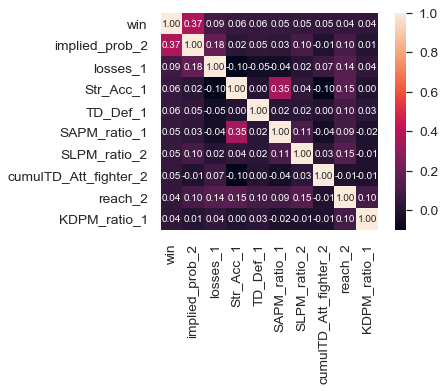

In [52]:
# Subset Correlation Matrix
n = 10 #number of variables for heatmap
corrmat = B.corr()
cols = corrmat.nlargest(n, 'win')['win'].index
cm = np.corrcoef(B[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [53]:
y = B.loc[:, 'win']
X = B.iloc[:, 0:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

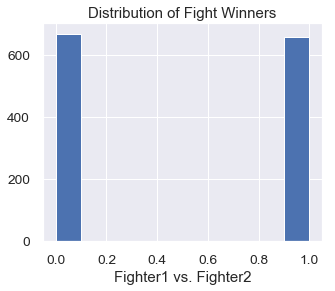

In [54]:
y.hist(figsize=(5,4))
plt.title('Distribution of Fight Winners')
plt.xlabel('Fighter1 vs. Fighter2')
plt.savefig('Distribution_Winners.png')

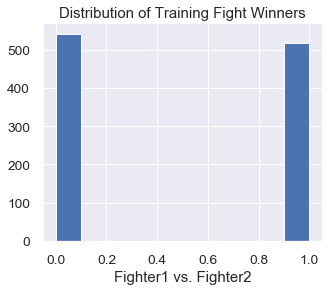

In [55]:
y_train.hist(figsize=(5,4))
plt.title('Distribution of Training Fight Winners')
plt.xlabel('Fighter1 vs. Fighter2')
plt.savefig('Distribution_Train_Winners.png')

In [56]:
#print metrics function
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds)))
    print("Recall Score: {}".format(recall_score(test, preds)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds)))

#function to look at importance of features
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

# Dummy Classifier

In [84]:
# Fitting and training the dummy
dummy = DummyClassifier(strategy='stratified', random_state=20)
dummy.fit(X_train, y_train)

# Dummy predictions
dum_pred = dummy.predict(X_test)

#Printing out results
print_metrics(y_test, dum_pred)

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, dum_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Precision Score: 0.5174825174825175
Recall Score: 0.5323741007194245
Accuracy Score: 0.49624060150375937
F1 Score: 0.5248226950354611

Confusion Matrix
----------------


Predicted  0.0  1.0  All
True                    
0.0         58   69  127
1.0         65   74  139
All        123  143  266

# Logistic Regression

In [85]:
#logistic regression
logreg = LogisticRegression(fit_intercept = False, C = 1e16, random_state=20)
model_log = logreg.fit(X_train, y_train)
model_log

/Users/hmnathel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=20, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred = logreg.predict(X_test)

#Printing out results
print_metrics(y_test, y_pred)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Precision Score: 0.6204379562043796
Recall Score: 0.6115107913669064
Accuracy Score: 0.6015037593984962
F1 Score: 0.6159420289855072

AUC is :0.6

Confusion Matrix
----------------


Predicted  0.0  1.0  All
True                    
0.0         75   52  127
1.0         54   85  139
All        129  137  266

Test AUC: 0.6602277233331446
train AUC: 0.7532163159469433


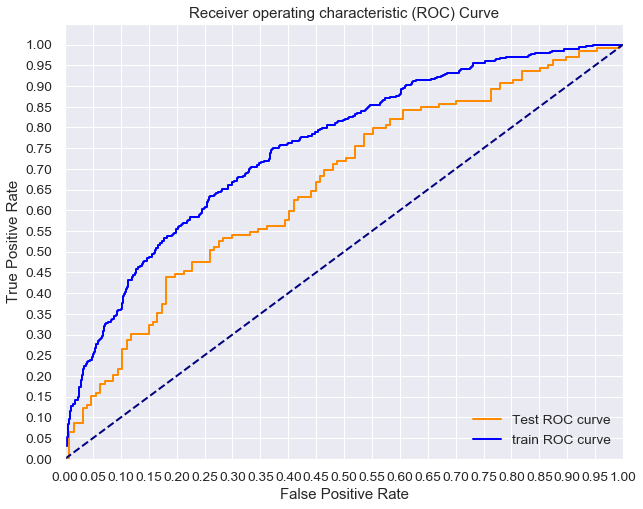

In [87]:
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='train ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#  Random Forrest

In [88]:
forest = RandomForestClassifier(random_state=20)
forest.fit(X_train, y_train)

/Users/hmnathel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [89]:
y_pred = forest.predict(X_test)

#Printing out results
print_metrics(y_test, y_pred)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Precision Score: 0.6796116504854369
Recall Score: 0.5035971223021583
Accuracy Score: 0.6165413533834586
F1 Score: 0.5785123966942148

AUC is :0.62

Confusion Matrix
----------------


Predicted  0.0  1.0  All
True                    
0.0         94   33  127
1.0         69   70  139
All        163  103  266

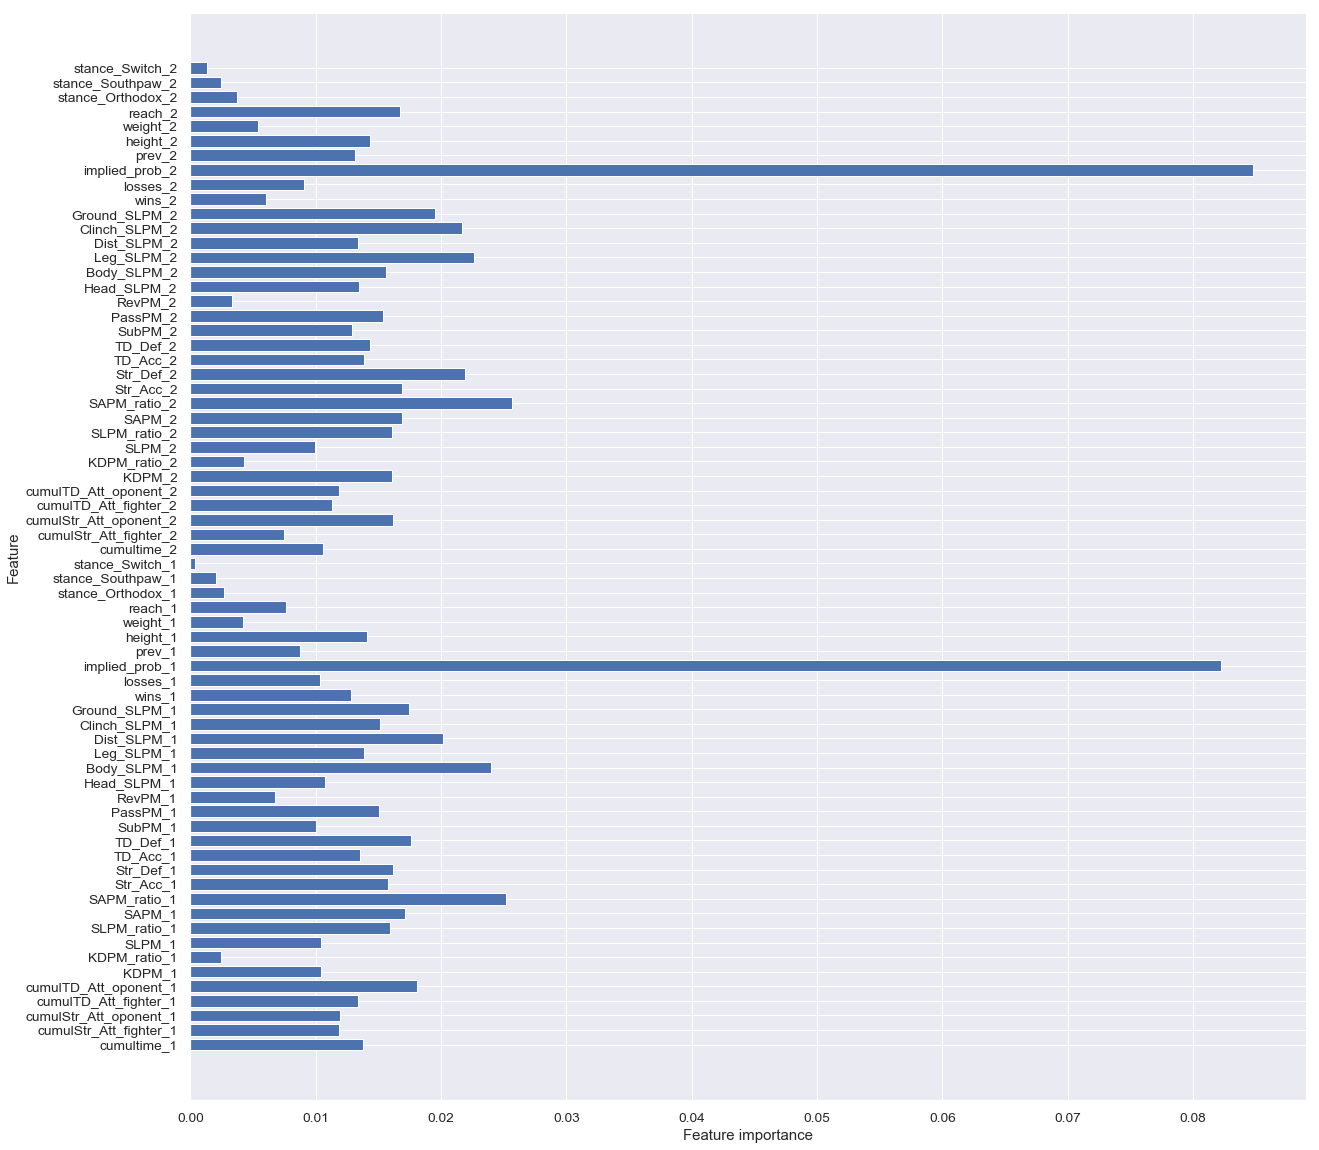

In [90]:
plot_feature_importances(forest)

### Grid Search on RF

In [91]:
##first running randomized search

param_distrib = {'max_depth': randint(1, 50),
                 'max_features': randint(1, 16),
                 'min_samples_split': randint(2, 1000),
                 'min_samples_leaf': randint(2, 1000),
                 'n_estimators': [10, 100]
                }
clf = RandomizedSearchCV(RandomForestClassifier(), param_distrib, n_iter=1000)
clf.fit(X, y)
clf.best_params_

/Users/hmnathel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 121,
 'min_samples_split': 555,
 'n_estimators': 10}

In [92]:
##running randomized search 2nd time

param_distrib = {'max_depth': randint(1, 50),
                 'max_features': randint(1, 16),
                 'min_samples_split': randint(2, 1000),
                 'min_samples_leaf': randint(2, 1000),
                 'n_estimators': [10, 100]
                }
clf = RandomizedSearchCV(RandomForestClassifier(), param_distrib, n_iter=1000)
clf.fit(X, y)
clf.best_params_

/Users/hmnathel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 7,
 'max_features': 11,
 'min_samples_leaf': 256,
 'min_samples_split': 229,
 'n_estimators': 10}

In [93]:
##running randomized search third time

param_distrib = {'max_depth': randint(1, 50),
                 'max_features': randint(1, 16),
                 'min_samples_split': randint(2, 1000),
                 'min_samples_leaf': randint(2, 1000),
                 'n_estimators': randint(10, 100)
                }
clf = RandomizedSearchCV(RandomForestClassifier(), param_distrib, n_iter=1000)
clf.fit(X, y)
clf.best_params_

/Users/hmnathel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 26,
 'max_features': 15,
 'min_samples_leaf': 153,
 'min_samples_split': 92,
 'n_estimators': 16}

In [95]:
#creating grid for grid search for random forest

rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10, 15, 20],
    'max_features': [None, 2, 10, 15, 20, 30],
    'min_samples_split': [2, 10, 50, 75, 100, 125],
    'min_samples_leaf': [25, 50, 100, 150, 200],
    'n_estimators': [10, 50, 100, 150],
}


rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3, return_train_score=True, verbose=3)
rf_grid_search.fit(X, y)

Fitting 3 folds for each of 8640 candidates, totalling 25920 fits
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.765, test=0.652), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.790, test=0.595), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.767, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.802, test=0.658), total=   0.7s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.816, test=0.618), total=   0.7s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.805, test=0.631), total=   0.6s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.803, test=0.654), total=   1.1s
[

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.808, test=0.654), total=   2.0s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.816, test=0.622), total=   1.7s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.825, test=0.627), total=   1.8s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.736, test=0.638), total

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.733, test=0.658), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.735, test=0.604), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.747, test=0.615), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.732, test=0.649), t

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.717, test=0.656), total=   1.6s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.747, test=0.609), total=   1.8s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.738, test=0.633), total=   1.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.718, test=0.663), total

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.731, test=0.654), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.745, test=0.604), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.732, test=0.629), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.722, test=0.656), t

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.679, test=0.643), total=   0.8s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.684, test=0.620), total=   0.9s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.699, test=0.611), total=   0.8s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.674, test=0.652), tot

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.676, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.689, test=0.609), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.688, test=0.611), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.673, test=0.649), t

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.691, test=0.618), total=   0.9s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.679, test=0.643), total=   1.3s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.684, test=0.620), total=   0.9s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.699, te

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.639, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.661, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.639, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.643, test=0.643), t

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.644, test=0.633), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.640, test=0.645), total=   0.6s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.655, test=0.593), total=   0.7s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.647, te

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.640, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.656, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.638, test=0.645), t

[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.635, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.638, test=0.645), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.656, test=0.595), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.638, test=0.64

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.840, test=0.609), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.819, test=0.613), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.840, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.848, test=0.629), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.836, test=0.629), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.695, test=0.570), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.705, test=0.586), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.717, test=0.586), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.776, test=0.572), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.771, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.786, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.798, test=0.588), total=   0.1s
[CV]

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.778, test=0.629), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.663, test=0.536), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.679, test=0.545), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.666, test=0.548), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.762, test=0.534), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.744, test=0.588), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.755, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.776, test=0.590), total=   0.2s
[CV]

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.729, test=0.627), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.666, test=0.602), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.623, test=0.577), total=   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.675, test=0.525), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.681, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.701, test=0.586), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.713, test=0.586), total=   0.1s
[CV]

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.729, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.637, test=0.611), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.633, test=0.590), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.647, test=0.611), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.679, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.673, test=0.638), total=   0.1s
[CV

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.679, test=0.615), total=   0.

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.673, test=0.629), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.619, test=0.624), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.643, test=0.604), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.628, test=0.604), total=   0.0s
[CV] crit

[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.614, test=0.550), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.649, test=0.595), total=   0.

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.816, test=0.611), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.742, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.781, test=0.602), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.779, test=0.622), total=   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.792, test=0.611), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.756, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.792, test=0.620), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.799, test=0.622), total=   0.2s
[CV]

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.769, test=0.622), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.695, test=0.618), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.725, test=0.615), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.722, test=0.579), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.717, test=0.647), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.736, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.765, test=0.629), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.718, test=0.652), total=   0.3s
[CV

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.734, test=0.611), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.744, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.725, test=0.658), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.730, test=0.627), total=   0.2s

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.700, test=0.618), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.701, test=0.622), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.680, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.697, test=0.613), total=   0.0s


[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.690, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.702, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.663, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.698, test=0.602), total=

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.671, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.666, test=0.654), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.666, test=0.611), total=   0.0s
[CV

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.675, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.657, test=0.654), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.664, test=0.618), total=   0.5s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.649), total=   0.

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.666, test=0.654), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.653, test=0.593), total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.648, test=0.656), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.644, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.662, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.656, test=0.654), total=   0.

[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.653, test=0.593), total=   

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.809, test=0.615), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.795, test=0.663), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.810, test=0.606), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.819, test=0.615), total=   0.4s
[CV]

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.803, test=0.627), total=   0.5s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.715, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.739, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.743, test=0.590), total=   0.0s
[CV

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.740, test=0.613), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.710, test=0.643), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.738, test=0.622), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.741, test=0.613), total=   0.3s
[CV] criter

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.747, test=0.631), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.702, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.715, test=0.633), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.719, test=0.609), total=   0.0s
[CV] crit

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.733, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.704, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.722, test=0.618), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.736, test=0.613), total=   0.

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.700, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.665, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.686, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.667, test=0.606), total=   0.0s
[C

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.701, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.666, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.698, test=0.597), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.708, test=0.609), tota

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.660, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.650, test=0.647), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.664, test=0.609), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.649, test=0.640), total=   0.0s
[CV

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.649, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.664, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.654, test=0.643), total=   0

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.652, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.644, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.667, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.646, test=0.643), total=   0.1s
[CV]

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.650, test=0.563), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.647, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.645, test=0.643), total=   0.1s
[CV

[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.667, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.646, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.644, test=0.647), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.666, test=0.600), tot

[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.792, test=0.667), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.798, test=0.615), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.811, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.793, test=0.647), total=   0.4s
[CV] cri

[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.744, test=0.649), total=   0.6s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.777, test=0.609), total=   0.5s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.776, test=0.629), total=   0.6s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.709, test=0.667), total=   0.0

[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.721, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.740, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.747, test=0.636), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.714, test=0.645), total=   0.3s
[CV] cri

[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.721, test=0.647), total=   0.5s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.735, test=0.613), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.741, test=0.615), total=   0.5s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.697, test=0.652), total=   0.0s
[CV

[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.689, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.682, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.672, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.693, test=0.588), total=   0.2s
[CV] c

[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.693, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.693, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.663, test=0.656), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.705, test=0.624), total=   0.0s


[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.689, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.682, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.672, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.693, test=0.588), total=

[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.666, test=0.602), total=   0.5s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.665, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.687, test=0.627), total=   0.0s


[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.649, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.600), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.653, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.650, test=0.647), tot

[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.667, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.648, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.641, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.665, test=0.595), total=   0.2s

[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.664, test=0.593), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.646, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.655, test=0.600), total=   0

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.810, test=0.609), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.803, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.800, test=0.661), total=   0.6s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.809, test=0.622), total=   0.6s
[CV] criterio

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.817, test=0.618), total=   0.9s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.820, test=0.622), total=   0.9s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.748, test=0.656), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.742, test=0.606), total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.749, test=0.615), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.748, test=0.622), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.721, test=0.654), total=   0.5s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.742, test=0.622), total=   0.4s

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.740, test=0.595), total=   0.6s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.758, test=0.622), total=   0.6s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.698, test=0.647), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.718, test=0.636), total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.739, test=0.600), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.740, test=0.622), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.719, test=0.649), total=   0.5s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.733, test=0.602), total=   0.4s

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.698, test=0.609), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.690, test=0.627), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.665, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.687, test=0.643), total=   0.0s
[CV

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.682, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.673, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.692, test=0.611), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.688, test=0.629), total=   0.

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.690, test=0.627), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.641, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.663, test=0.609), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.663, test=0.640), total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.645, test=0.652), total=   0.3s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.663, test=0.609), total=   0.4s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.649, test=0.633), total=   0.5s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.644, test=0.647), total=   0

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.655, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.656, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.645, test=0.652), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.663, test=0.609), total=

[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.657, test=0.597), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.647, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.636, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.657, test=0.590), total=   0.0s


[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.656, test=0.595), total=

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.654, test=0.606), total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.637, test=0.609), total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.645, test=0.640), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.652, test=0.600), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.655, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.635, test=0.613), total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.645, test=0.643), total=   0.6s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.654, test=0.606), total=   0.6s
[CV] criterio

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.654, test=0.606), total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.637, test=0.609), total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.648, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.652, test=0.600), total=   0.1s
[CV] criterion=

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.655, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.635, test=0.613), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.643, test=0.638), total=   0.6s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.655, test=0.606), total=   0.5s
[CV] criterio

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.655, test=0.606), total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.633, test=0.611), total=   0.8s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.648, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.652, test=0.600), total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.655, test=0.602), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.637, test=0.615), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.640, test=0.638), total=   0.5s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.654, test=0.606), total=   0.5s
[CV] c

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.654, test=0.606), total=   0.7s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.638, test=0.615), total=   0.7s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.648, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.654, test=0.604), total=   0.0s
[CV

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.661, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.639, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.643, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.657, test=0.604), total=   0.5s
[CV] criterio

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.655, test=0.593), total=   0.7s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.647, test=0.640), total=   0.9s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.648, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.653, test=0.606), total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.661, test=0.606), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.639, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.643, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.657, test=0.604), total=   0.5s

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.656, test=0.595), total=   0.6s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.638, test=0.640), total=   0.5s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.637, test=0.645), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.654, test=0.600), total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.638, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.656, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.635, test=0.645), total=   0.

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.742, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.626, test=0.561), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.689, test=0.588), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.645, test=0.604), total=   0.0s
[CV] criterion=gini, max_depth=2, max_

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.714, test=0.563), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.743, test=0.586), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.725, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.724, test=0.577), total=   0.1s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.697, test=0.545), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.693, test=0.568), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.701, test=0.566), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.735, test=0.586), total=   0.1s
[CV] criterion=gini, max_depth=2, max_f

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.697, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.693, test=0.568), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.701, test=0.566), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.735, test=0.586), total=   0.1s
[CV] criterion=gini, max_depth=2

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.640, test=0.563), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.648, test=0.579), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.640, test=0.572), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.645, test=0.543), total=   0.1s
[CV] criterion=gini, max_depth=2, max_

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.673, test=0.568), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.714, test=0.579), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.698, test=0.629), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.699, test=0.588), total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.666, test=0.575), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.673, test=0.568), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.714, test=0.579), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.698, test=0.629), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.672, test=0.552), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.679, test=0.615), total=   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.638, test=0.548), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.646, test=0.529), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.654, test=0.590), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.673, test=0.629), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.619, test=0.624), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.643, test=0.604), total=   0.0s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.654, test=0.633), total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.715, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.712, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.698, test=0.656), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.712, test=0.611), total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.724, test=0.620), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.663, test=0.629), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.679, test=0.613), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.676, test=0.595), total=   0.0s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.708, test=0.613), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.717, test=0.615), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.678, test=0.661), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.700, test=0.613), total=   0.2s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.724, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.704, test=0.609), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.690, test=0.665), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.708, test=0.613), total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.713, test=0.613), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.666, test=0.627), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.679, test=0.593), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.687, test=0.602), total=   0.0s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.674, test=0.663), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.696, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.695, test=0.615), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.673, test=0.663), total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.693, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.696, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.674, test=0.663), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.696, test=0.627), total=   0.1s
[CV] criterio

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.666, test=0.611), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.664, test=0.620), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.661, test=0.643), total=   0.1s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.657, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.664, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.663, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.657, test=0.656), total=   0.2s
[CV] crite

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.648, test=0.656), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.644, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.662, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.656, test=0.654), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.653, test=0.593), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.675, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.710, test=0.620), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.710, test=0.597), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.672, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.709, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.710, test=0.631), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.675, test=0.647), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.710, test=0.622), total=   0.2s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.708, test=0.600), total=   0.6s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.671, test=0.633), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.657, test=0.588), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.686, test=0.615), total=   0.0s
[CV] criterion=gini, max_depth=2, m

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.676, test=0.654), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.704, test=0.622), total=   0.6s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.708, test=0.609), total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.675, test=0.647), total=   0.4s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.673, test=0.647), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.699, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.706, test=0.609), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.678, test=0.658), total=   0.2s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.687, test=0.609), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.691, test=0.611), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.654, test=0.658), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.669, test=0.606), total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.674, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.691, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.665, test=0.647), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.681, test=0.602), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.664, test=0.604), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.660, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.650, test=0.647), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.664, test=0.609), total=   0.0s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.604), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.664, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.654, test=0.643), total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.664, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.652, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.644, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.667, test=0.597), total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.646, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.650, test=0.563), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.647, test=0.631), total=   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.652, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.644, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.667, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.646, test=0.643), total=   0.1s
[CV] criter

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.678, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.699, test=0.613), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.699, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.669, test=0.649), total=   0.3s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.689, test=0.613), total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.702, test=0.629), total=   0.6s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.686, test=0.647), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.691, test=0.618), total=   0.1s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.704, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.660, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.690, test=0.609), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.698, test=0.624), total=   0.2s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.665, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.687, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.704, test=0.597), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.660, test=0.645), total=   0.2s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.683, test=0.613), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.689, test=0.622), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.658, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.682, test=0.627), total=   0.0s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.681, test=0.609), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.681, test=0.622), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.662, test=0.645), total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.664, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.653, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.649, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.662, test=0.600), total=   0.2s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.665, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.687, test=0.627), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.655, test=0.638), total=   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.649, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.662, test=0.600), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.653, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.650, test=0.647), total=   0.3s
[CV] crite

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.667, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.648, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.641, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.665, test=0.595), total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.664, test=0.593), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.646, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.655, test=0.600), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.690, test=0.631), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.655, test=0.649), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.684, test=0.618), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.693, test=0.611), total=   0.3s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.666, test=0.658), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.687, test=0.609), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.692, test=0.613), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.647), total=   0.3s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.684, test=0.618), total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.695, test=0.629), total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.650, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.665, test=0.600), total=   0.0s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.686, test=0.627), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.655, test=0.649), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.675, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.692, test=0.613), total=   0.3s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.652, test=0.645), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.669, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.678, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.657, test=0.645), total=   0.2s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.675, test=0.611), total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.673, test=0.638), total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.660, test=0.652), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.669, test=0.609), total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.678, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.657, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.679, test=0.609), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.675, test=0.627), total=   0.2s
[CV] criter

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.655, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.645, test=0.652), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.663, test=0.609), total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.669, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.653, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.641, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.663, test=0.609), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.645, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.786, test=0.609), total=   1.5s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.781, test=0.624), total=   1.5s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.738, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.758, test=0.609), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.770, test=0.613), total=   0.7s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.758, test=0.618), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.762, test=0.654), total=   1.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.778, test=0.602), total=   1.0s
[CV] criterio

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.739, test=0.604), total=   1.2s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.750, test=0.631), total=   1.5s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.715, test=0.663), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.729, test=0.622), total=   0.1s
[CV] criterion=

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.741, test=0.597), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.730, test=0.638), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.718, test=0.654), total=   0.8s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.741, test=0.618), total=   1.1s
[CV] criterio

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.742, test=0.611), total=   1.2s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.738, test=0.629), total=   1.4s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.701, test=0.667), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.717, test=0.611), total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.689, test=0.609), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.688, test=0.611), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.673, test=0.649), total=   0.6s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.688, test=0.613), total=   0.6s
[CV] c

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.684, test=0.620), total=   0.8s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.699, test=0.611), total=   0.8s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.674, test=0.652), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.692, test=0.595), total=   0.1s
[CV

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.661, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.639, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.643, test=0.643), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.657, test=0.604), total=   0.4s
[CV] criterio

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.655, test=0.593), total=   0.6s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.647, test=0.640), total=   0.6s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.648, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.653, test=0.606), total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.661, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.639, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.643, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.657, test=0.604), total=   0.4s

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.656, test=0.595), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.638, test=0.640), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.637, test=0.645), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.654, test=0.600), total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.638, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.656, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.635, test=0.645), total=   0.

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.816, test=0.615), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.684, test=0.550), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.710, test=0.581), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.680, test=0.600), total=   0.0s
[CV] criterion=gini, max_depth=5, max_

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.787, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.802, test=0.611), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.810, test=0.584), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.782, test=0.629), total=   0.2s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.743, test=0.575), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.752, test=0.523), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.742, test=0.584), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.760, test=0.604), total=   0.2s
[CV] criterion=gini, max_depth=5, max_fea

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.769, test=0.627), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.660, test=0.523), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.667, test=0.561), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.671, test=0.545), total=   0.0s
[CV] criterion=gini, max_depth=5, max

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.757, test=0.586), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.781, test=0.584), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.747, test=0.622), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.752, test=0.600), total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.650, test=0.509), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.675, test=0.525), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.681, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.701, test=0.586), total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.729, test=0.627), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.666, test=0.602), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.623, test=0.577), total=   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.679, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.673, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.688, test=0.563), total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.638, test=0.548), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.646, test=0.529), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.654, test=0.590), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.673, test=0.629), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.619, test=0.624), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.643, test=0.604), total=   0.0s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.614, test=0.550), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.765, test=0.645), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.775, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.777, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.753, test=0.649), total=   0.3s
[CV] criterion=gini, max_depth=5, ma

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.778, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.784, test=0.627), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.716, test=0.609), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.741, test=0.604), total=   0.0s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.727, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.748, test=0.627), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.756, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.724, test=0.640), total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.740, test=0.615), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.752, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.716, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.739, test=0.633), total=   0.2s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.757, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.686, test=0.629), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.705, test=0.593), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.719, test=0.586), total=   0.1s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.663, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.698, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.700, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.678, test=0.652), total=   0.2s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.690, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.702, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.663, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.698, test=0.602), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.671, test=0.606), total=   0.7s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.666, test=0.654), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.666, test=0.611), total=   0.0s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.657, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.664, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.657, test=0.656), total=   0.2s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.648, test=0.656), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.644, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.662, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.656, test=0.654), total=   0.2s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.645, test=0.647), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.658, test=0.611), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.648, test=0.656), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.644, test=0.654), total=   0.2s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.646, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.661, test=0.602), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.739, test=0.647), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.777, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.760, test=0.643), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.782, test=0.611), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.785, test=0.649), total=   0.3s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.717, test=0.640), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.747, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.751, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.724, test=0.640), total=   0.3s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.735, test=0.590), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.739, test=0.624), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.696, test=0.652), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.712, test=0.624), total=   0.0s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.736, test=0.622), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.707, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.732, test=0.622), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.738, test=0.611), total=   0.3s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.697, test=0.584), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.701, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.666, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.698, test=0.597), total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.700, test=0.597), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.700, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.665, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.686, test=0.606), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.669, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.663, test=0.604), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.664, test=0.638), total=   0.4s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.664, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.669, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.604), total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.664, test=0.604), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.660, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.650, test=0.563), total=   0.0s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.652, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.644, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.667, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.646, test=0.643), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.650, test=0.563), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.647, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.645, test=0.643), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.774, test=0.606), total=   0.6s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.778, test=0.627), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.760, test=0.658), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.776, test=0.609), total=   0.9s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.727, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.731, test=0.652), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.751, test=0.613), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.757, test=0.627), total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.716, test=0.647), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.735, test=0.618), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.743, test=0.620), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.702, test=0.654), total=   0.0s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.729, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.710, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.729, test=0.622), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.735, test=0.613), total=   0.3s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.666, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.689, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.682, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.672, test=0.638), total=   0.2s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.693, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.693, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.663, test=0.656), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.705, test=0.624), total=   0.1s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.689, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.682, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.672, test=0.638), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.693, test=0.588), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.665, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.687, test=0.627), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.655, test=0.638), total=   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.649, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.600), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.653, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.650, test=0.647), total=   0.3s
[CV] crite

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.667, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.648, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.641, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.665, test=0.595), total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.664, test=0.593), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.646, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.655, test=0.600), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.778, test=0.618), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.775, test=0.636), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.762, test=0.645), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.779, test=0.615), total=   0.6s
[CV] criterion=gini, max_depth=5, 

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.787, test=0.645), total=   1.0s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.725, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.744, test=0.584), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.721, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.715, test=0.643), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.736, test=0.618), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.745, test=0.638), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.716, test=0.643), total=   0.7s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.722, test=0.649), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.738, test=0.604), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.733, test=0.629), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.713, test=0.654), total=   0.5s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.731, test=0.604), total=   1.1s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.757, test=0.622), total=   0.9s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.684, test=0.652), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.713, test=0.609), total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.682, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.673, test=0.640), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.692, test=0.611), total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.688, test=0.629), total=   0.4s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.690, test=0.627), total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.665, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.687, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.660, test=0.631), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.645, test=0.652), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.663, test=0.609), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.649, test=0.633), total=   0.2s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.655, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.645, test=0.652), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.609), total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.669, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.653, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.636, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.657, test=0.590), total=   0.0s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.645, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.816, test=0.622), total=   1.9s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.825, test=0.627), total=   2.2s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.765, test=0.652), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.790, test=0.595), total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.755, test=0.597), total=   0.6s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.767, test=0.624), total=   0.5s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.748, test=0.656), total=   0.9s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.771, test=0.613), total=   0.9s

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.747, test=0.609), total=   1.4s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.738, test=0.633), total=   1.3s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.718, test=0.663), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.726, test=0.620), total=   0.1s
[CV] crite

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.745, test=0.604), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.732, test=0.629), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.722, test=0.656), total=   0.8s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.749, test=0.615), total=   0.8s
[CV] c

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.725, test=0.609), total=   1.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.732, test=0.638), total=   1.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.674, test=0.652), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.692, test=0.595), total=   0.1s
[CV]

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.689, test=0.609), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.688, test=0.611), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.673, test=0.649), total=   0.5s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.688, test=0.613), total=   0.6s

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.684, test=0.620), total=   1.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.699, test=0.611), total=   0.9s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.674, test=0.652), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.692, test=0.595), total= 

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.639, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.643, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.657, test=0.604), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.644, test=0.633), total=   0.

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.647, test=0.640), total=   0.6s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.648, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.653, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.641, test=0.624), total=   0

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.638, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.656, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.635, test=0.645), total=   0.3s
[CV]

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.638, test=0.640), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.637, test=0.645), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.654, test=0.600), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.640, test=0.633), total=   0.0s
[C

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.638, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.656, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.635, test=0.645), tota

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.850, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.817, test=0.613), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.845, test=0.611), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.850, test=0.636), total=   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.776, test=0.572), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.771, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.786, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.799, test=0.590), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.762, test=0.534), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.744, test=0.588), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.755, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.776, test=0.590), total=   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.775, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.733, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.757, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.776, test=0.597), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.675, test=0.525), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.681, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.701, test=0.586), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.713, test=0.586), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.729, test=0.627), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.666, test=0.602), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.623, test=0.577), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.679, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.673, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.688, test=0.563), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.679, test=0.615), total=   0.1s
[CV] criter

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.673, test=0.629), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.619, test=0.624), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.643, test=0.604), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.628, test=0.604), total=   0.0s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.654, test=0.633), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.788, test=0.661), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.803, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.798, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.785, test=0.649), total=   0.3s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.808, test=0.611), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.816, test=0.611), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.738, test=0.622), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.774, test=0.590), total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.751, test=0.631), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.760, test=0.609), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.733, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.750, test=0.620), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.762, test=0.636), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.695, test=0.618), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.725, test=0.615), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.722, test=0.579), total=   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.717, test=0.647), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.736, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.765, test=0.629), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.718, test=0.652), total=   0.3s
[CV] crite

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.690, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.702, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.663, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.698, test=0.602), total=   0.1s
[CV] criterio

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.700, test=0.618), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.701, test=0.622), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.680, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.697, test=0.613), total=   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.661, test=0.611), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.675, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.657, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.664, test=0.618), total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.671, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.666, test=0.654), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.666, test=0.611), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.661, test=0.611), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.675, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.657, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.664, test=0.618), total=   0.1s
[CV] c

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.653, test=0.593), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.648, test=0.656), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.644, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.656, test=0.654), total=   0.1s
[CV]

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.818, test=0.618), total=   0.6s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.790, test=0.627), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.767, test=0.602), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.771, test=0.622), total=   0.0s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.771, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.798, test=0.618), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.799, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.765, test=0.643), total=   0.5s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.713, test=0.636), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.751, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.740, test=0.613), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.710, test=0.643), total=   0.3s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.735, test=0.597), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.747, test=0.631), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.702, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.715, test=0.633), total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.733, test=0.624), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.704, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.722, test=0.618), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.736, test=0.613), total=   0.2s
[CV] criter

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.700, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.665, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.686, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.667, test=0.606), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.666, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.698, test=0.597), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.708, test=0.609), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.678, test=0.647), total=   0.3s
[CV

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.664, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.669, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.663, test=0.604), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.664, test=0.604), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.660, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.650, test=0.647), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.664, test=0.609), total=   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.664, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.652, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.644, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.667, test=0.597), total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.646, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.650, test=0.563), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.647, test=0.631), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.652, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.644, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.667, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.646, test=0.643), total=   0.1s
[CV]

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.826, test=0.629), total=   0.6s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.760, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.757, test=0.593), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.775, test=0.620), total=   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.776, test=0.629), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.736, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.771, test=0.613), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.770, test=0.624), total=   0.3s
[CV] criter

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.741, test=0.615), total=   0.5s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.697, test=0.652), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.731, test=0.618), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.722, test=0.615), total=   0.0s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.714, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.727, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.748, test=0.620), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.721, test=0.647), total=   0.5s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.666, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.689, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.682, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.672, test=0.638), total=   0.2s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.672, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.693, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.693, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.663, test=0.656), total=   0.0s
[CV] criteri

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.666, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.689, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.682, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.672, test=0.638), total=   0.2s
[CV] cri

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.650, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.666, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.665, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criteri

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.664, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.653, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.649, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.600), total=   0.2s
[CV] c

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.664, test=0.593), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.646, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.655, test=0.600), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.667, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.648, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.641, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.665, test=0.595), total=   0.1s
[CV] criterio

[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.664, test=0.593), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.646, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.753, test=0.658), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.758, test=0.615), total=   0.1s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.803, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.800, test=0.661), total=   0.5s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.809, test=0.622), total=   0.5s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.827, test=0.629), total=   0.5s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.775, test=0.643), total=   0.7s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.708, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.721, test=0.611), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.723, test=0.627), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.719, test=0.649), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.733, test=0.602), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.752, test=0.633), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.718, test=0.649), total=   0.6s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.730, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.739, test=0.600), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.740, test=0.622), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.719, test=0.649), total=   0.4s
[CV] criterion=

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.678, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.698, test=0.609), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.690, test=0.627), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.665, test=0.638), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.669, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.686, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.682, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.673, test=0.640), total=   0.3s
[CV] criterion=

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.678, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.698, test=0.609), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.690, test=0.627), total=   0.4s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.641, test=0.638), total=   0.0s
[CV] crit

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.655, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.645, test=0.652), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.663, test=0.609), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.669, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.653, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.641, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.663, test=0.609), total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.657, test=0.597), total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.647, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.636, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.657, test=0.590), total=   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.816, test=0.618), total=   0.5s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.805, test=0.631), total=   0.6s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.803, test=0.654), total=   1.3s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.817, test=0.613), total=   1.3s
[CV] criterio

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.816, test=0.622), total=   2.4s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.825, test=0.627), total=   1.6s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.736, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.771, test=0.622), total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.735, test=0.604), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.747, test=0.615), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.732, test=0.649), total=   0.8s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.745, test=0.602), total=   0.8s

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.747, test=0.609), total=   1.5s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.738, test=0.633), total=   1.4s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.718, test=0.663), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.726, test=0.620), total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.745, test=0.604), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.732, test=0.629), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.722, test=0.656), total=   0.8s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.749, test=0.615), total=   0.8s

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.684, test=0.620), total=   0.9s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.699, test=0.611), total=   0.8s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.674, test=0.652), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.692, test=0.595), total=   0.1s
[CV

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.689, test=0.609), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.688, test=0.611), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.673, test=0.649), total=   0.6s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.688, test=0.613), total=   0.6s

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.684, test=0.620), total=   1.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.699, test=0.611), total=   0.9s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.648, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.653, test=0.606), total=   0.0s
[

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.661, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.639, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.643, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.657, test=0.604), total=   0.4s

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.655, test=0.593), total=   0.8s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.647, test=0.640), total=   0.7s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.648, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.653, test=0.606), total= 

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.640, test=0.633), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.638, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.656, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.635, test=0.645), total=   0.

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.638, test=0.640), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.637, test=0.645), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.654, test=0.600), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.640, test=0.633), total=   0

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.819, test=0.613), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.840, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.848, test=0.629), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.811, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.817, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.809, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.809, test=0.600), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.824, test=0.604), total=   0.2s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.663, test=0.536), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.679, test=0.545), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.666, test=0.548), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.724, test=0.518), total=   0.1s
[CV] criterion=gini, max_depth=15, max

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.755, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.776, test=0.590), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.750, test=0.618), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.768, test=0.590), total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.775, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.733, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.757, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.776, test=0.597), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.675, test=0.525), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.681, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.701, test=0.586), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.713, test=0.586), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.729, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.666, test=0.602), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.623, test=0.577), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.679, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.673, test=0.638), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.679, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.673, test=0.638), total=   0.1s
[CV] crite

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.654, test=0.633), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.654, test=0.633), total=   0.1s
[CV] crite

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.788, test=0.661), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.803, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.798, test=0.615), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.785, test=0.649), total=   0.2s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.790, test=0.618), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.798, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.716, test=0.656), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.745, test=0.604), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.743, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.764, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.717, test=0.647), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.736, test=0.638), total=   0.2s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.762, test=0.636), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.695, test=0.618), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.725, test=0.615), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.722, test=0.579), total=   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.725, test=0.658), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.730, test=0.627), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.757, test=0.633), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.705, test=0.661), total=   0.3s
[CV] crite

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.665, test=0.652), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.690, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.702, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.663, test=0.645), total=   0.2s
[CV] criterion=

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.678, test=0.652), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.700, test=0.618), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.701, test=0.622), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.680, test=0.638), total=   0.0s
[CV] 

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.675, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.657, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.664, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.663, test=0.649), total=   0.1s
[CV] criter

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.666, test=0.654), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.666, test=0.611), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.664, test=0.620), total=   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.648, test=0.656), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.644, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.662, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.656, test=0.654), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.653, test=0.593), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.645, test=0.647), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.658, test=0.611), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.662, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.656, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.646, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.661, test=0.602), total=   0.2s
[CV

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.795, test=0.670), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.821, test=0.597), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.809, test=0.615), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.795, test=0.663), total=   0.3s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.743, test=0.636), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.766, test=0.606), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.774, test=0.613), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.702, test=0.640), total=   0.0s
[CV] criteri

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.713, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.751, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.740, test=0.613), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.710, test=0.643), total=   0.3s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.735, test=0.597), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.747, test=0.631), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.702, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.715, test=0.633), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.697, test=0.584), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.701, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.666, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.698, test=0.597), total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.700, test=0.597), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.700, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.665, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.686, test=0.606), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.697, test=0.584), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.701, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.666, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.698, test=0.597), total=   0.2s
[CV] c

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.664, test=0.604), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.660, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.650, test=0.647), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.664, test=0.609), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.664, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.669, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.663, test=0.604), total=   0.1s
[CV] c

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.646, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.650, test=0.563), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.647, test=0.631), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.652, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.644, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.667, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.646, test=0.643), total=   0.1s
[CV] criter

[CV]  criterion=gini, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.646, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.760, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.757, test=0.593), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.775, test=0.620), total=   0.0s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.793, test=0.647), total=   0.5s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.804, test=0.615), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.824, test=0.627), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.792, test=0.654), total=   0.6s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.723, test=0.647), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.742, test=0.613), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.764, test=0.631), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.725, test=0.643), total=   0.3s
[CV] criterion=

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.735, test=0.613), total=   0.7s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.741, test=0.615), total=   0.5s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.697, test=0.652), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.731, test=0.618), total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.747, test=0.636), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.714, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.727, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.748, test=0.620), total=   0.3s
[CV] criter

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.693, test=0.624), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.663, test=0.656), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.705, test=0.624), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.686, test=0.620), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.682, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.672, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.693, test=0.588), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.687, test=0.633), total=   0.3s
[CV] criter

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.693, test=0.624), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.687, test=0.627), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.655, test=0.638), total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.649, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.662, test=0.600), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.653, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.650, test=0.647), total=   0.3s
[CV] crite

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.664, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.653, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.649, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.662, test=0.600), total=   0.2s
[CV] c

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.664, test=0.593), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.646, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.655, test=0.600), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.667, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.648, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.641, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.665, test=0.595), total=   0.1s
[CV] c

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.817, test=0.618), total=   0.8s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.820, test=0.622), total=   0.8s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.753, test=0.658), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.758, test=0.615), total=   0.1s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.783, test=0.627), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.761, test=0.645), total=   0.5s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.783, test=0.611), total=   0.5s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.792, test=0.647), total=   0.5s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.752, test=0.638), total=   1.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.698, test=0.647), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.718, test=0.636), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.713, test=0.622), total=   0.0s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.719, test=0.649), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.733, test=0.602), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.752, test=0.633), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.718, test=0.649), total=   0.6s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.698, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.719, test=0.604), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.740, test=0.631), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.699, test=0.645), total=   0.4s
[CV] criterion=

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.678, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.698, test=0.609), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.690, test=0.627), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.665, test=0.638), total=   0.0s
[CV] criteri

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.669, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.686, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.682, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.673, test=0.640), total=   0.3s
[CV] cri

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.644, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.669, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.653, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.641, test=0.638), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.646, test=0.645), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.655, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.645, test=0.652), total=   0.2s
[CV] criterion=

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.644, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.669, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.653, test=0.647), total=   0.4s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.636, test=0.649), total=   0.0s
[CV] crit

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.657, test=0.597), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.647, test=0.643), total=   0.3s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.636, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.657, test=0.590), total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.816, test=0.618), total=   0.5s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.805, test=0.631), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.803, test=0.654), total=   1.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.817, test=0.613), total=   1.1s
[CV] c

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.793, test=0.613), total=   1.7s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.798, test=0.622), total=   1.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.723, test=0.645), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.757, test=0.611), total=   0.1s
[CV

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.745, test=0.604), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.732, test=0.629), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.722, test=0.656), total=   0.8s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.749, test=0.615), total=   0.8s
[CV] criterio

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.747, test=0.609), total=   1.2s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.738, test=0.633), total=   1.2s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.718, test=0.663), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.726, test=0.620), total=   0.1s
[CV] cr

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.730, test=0.600), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.718, test=0.629), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.723, test=0.652), total=   0.8s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.730, test=0.615), total=   0.8s

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.684, test=0.620), total=   0.8s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.699, test=0.611), total=   0.8s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.674, test=0.652), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.692, test=0.595), total=   0.1s


[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.689, test=0.609), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.688, test=0.611), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.673, test=0.649), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.688, test=0.613), total=

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.655, test=0.593), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.647, test=0.640), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.648, test=0.643), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.653, test=0.606), total=   0.0s
[CV

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.661, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.639, test=0.645), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.643, test=0.643), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.657, test=0.604), total=   0.6s

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.655, test=0.593), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.647, test=0.640), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.637, test=0.645), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.654, test=0.600), total=   0.0s
[

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.638, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.656, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.635, test=0.645), total=   0.

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.638, test=0.640), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.637, test=0.645), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.654, test=0.600), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.640, test=0.633), total=   

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.840, test=0.609), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.819, test=0.613), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.840, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.848, test=0.629), total=   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.792, test=0.561), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.788, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.810, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.805, test=0.590), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.762, test=0.534), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.744, test=0.588), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.755, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.776, test=0.590), total=   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.762, test=0.534), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.744, test=0.588), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.755, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.776, test=0.590), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.675, test=0.525), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.681, test=0.595), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.701, test=0.586), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.713, test=0.586), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.729, test=0.627), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.666, test=0.602), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.623, test=0.577), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.679, test=0.615), total=   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.647, test=0.581), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.679, test=0.615), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.673, test=0.638), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.614, test=0.550), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.614, test=0.550), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.673, test=0.629), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.742, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.781, test=0.602), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.779, test=0.622), total=   0.0s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.785, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.805, test=0.609), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.812, test=0.609), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.785, test=0.656), total=   0.7s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.750, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.751, test=0.631), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.760, test=0.609), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.733, test=0.643), total=   0.4s
[CV] criterion=

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.736, test=0.620), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.762, test=0.636), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.695, test=0.618), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.725, test=0.615), total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.764, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.717, test=0.647), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.736, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.765, test=0.629), total=   0.2s
[CV] criter

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.701, test=0.622), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.680, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.697, test=0.613), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.701, test=0.606), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.645), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.698, test=0.602), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.700, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.678, test=0.652), total=   0.2s
[CV] crite

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.661, test=0.611), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.675, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.657, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.664, test=0.618), total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.671, test=0.606), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.666, test=0.654), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.666, test=0.611), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.675, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.657, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.664, test=0.618), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.663, test=0.649), total=   0.1s
[CV]

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.653, test=0.593), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.648, test=0.656), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.644, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.656, test=0.654), total=   0.1s
[CV]

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.818, test=0.618), total=   0.5s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.790, test=0.627), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.767, test=0.602), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.771, test=0.622), total=   0.0s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.771, test=0.647), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.798, test=0.618), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.799, test=0.602), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.765, test=0.643), total=   0.4s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.713, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.751, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.740, test=0.613), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.710, test=0.643), total=   0.2s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.735, test=0.597), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.747, test=0.631), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.702, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.715, test=0.633), total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.733, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.704, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.722, test=0.618), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.736, test=0.613), total=   0.2s
[CV] criter

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.700, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.665, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.686, test=0.606), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.667, test=0.606), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.666, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.698, test=0.597), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.708, test=0.609), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.678, test=0.647), total=   0.3s
[CV

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.664, test=0.604), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.669, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.663, test=0.604), total=   0.2s
[CV] criterio

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.664, test=0.604), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.660, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.650, test=0.647), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.664, test=0.609), total=   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.652, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.644, test=0.649), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.667, test=0.597), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.646, test=0.643), total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.650, test=0.563), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.647, test=0.631), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.645, test=0.643), total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.667, test=0.597), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.646, test=0.643), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.644, test=0.647), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.666, test=0.600), total=   0.2s
[CV

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.792, test=0.667), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.798, test=0.615), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.811, test=0.643), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.793, test=0.647), total=   0.4s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.744, test=0.649), total=   0.8s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.777, test=0.609), total=   0.9s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.776, test=0.629), total=   0.8s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.709, test=0.667), total=   0.0s
[CV] criteri

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.721, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.740, test=0.620), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.747, test=0.636), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.714, test=0.645), total=   0.4s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.735, test=0.613), total=   0.5s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.741, test=0.615), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.697, test=0.652), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.731, test=0.618), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.689, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.682, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.672, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.693, test=0.588), total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.693, test=0.595), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.693, test=0.624), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.663, test=0.656), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.705, test=0.624), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.689, test=0.602), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.682, test=0.624), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.672, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.693, test=0.588), total=   0.3s
[CV] c

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.666, test=0.602), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.665, test=0.640), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.687, test=0.627), total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.664, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.653, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.649, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.600), total=   0.2s
[CV] c

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.664, test=0.593), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.646, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.655, test=0.600), total=   0.0s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.667, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.648, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.641, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.665, test=0.595), total=   0.1s
[CV] criterio

[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.664, test=0.593), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.646, test=0.640), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.753, test=0.658), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.758, test=0.615), total=   0.1s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.803, test=0.624), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.800, test=0.661), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.809, test=0.622), total=   0.6s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.827, test=0.629), total=   0.6s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.775, test=0.643), total=   1.0s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.708, test=0.643), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.721, test=0.611), total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.723, test=0.627), total=   0.0s
[CV] criterion=g

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.719, test=0.649), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.733, test=0.602), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.752, test=0.633), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.718, test=0.649), total=   0.7s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.718, test=0.636), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.713, test=0.622), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.730, test=0.645), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.739, test=0.600), total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.692, test=0.611), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.688, test=0.629), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.678, test=0.643), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.698, test=0.609), total=   0.4s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.669, test=0.638), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.686, test=0.606), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.682, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.673, test=0.640), total=   0.3s
[CV] criterion=

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.678, test=0.643), total=   0.5s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.698, test=0.609), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.690, test=0.627), total=   0.5s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.641, test=0.638), total=   0.0s
[CV] crit

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.646, test=0.645), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.655, test=0.627), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.645, test=0.652), total=   0.2s
[CV] criterion=

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.644, test=0.647), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.669, test=0.602), total=   0.5s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.653, test=0.647), total=   0.4s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.641, test=0.638), total=   0.0s
[CV] 

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.643, test=0.654), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=

[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.637, test=0.649), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.657, test=0.597), total=   0.3s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.647, test=0.643), total=   0.2s
[CV] criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=gini, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.636, test=0.649), total=   0.0s
[CV] crite

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.800, test=0.652), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.821, test=0.622), total=   0.7s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.834, test=0.631), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.805, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.843, test=0.627), total=   1.9s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.809, test=0.667), total=   2.9s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.831, test=0.615), total=   2.3s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.718, test=0.604), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.738, test=0.624), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.745, test=0.654), total=   0.7s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.719, test=0.652), total=   1.2s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.749, test=0.629), total=   1.1s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.759, test=0.604), total=   1.1s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.757, test=0.613), total=   1.7s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.717, test=0.665), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.718, test=0.615), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.706, test=0.620), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.698, test=0.618), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.684, test=0.645), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.695

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.683, test=0.647), total=   1.0s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.695, test=0.615), total=   1.1s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.704, test=0.613), total=   1.1s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(tra

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.695, test=0.631), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.683, test=0.649), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.706, test=0.620), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(t

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.656, test=0.606), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.662, test=0.629), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.640, test=0.645), total=   0.9s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(t

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.639, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.660, test=0.606), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.671, test=0.604), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.638, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.638, test=0.645), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.656, test=0.595), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=

[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.638, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.638, test=0.645), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.656, test=0.595), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150, s

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.835, test=0.572), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.844, test=0.604), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.820, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.847, test=0.611), total=

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.813, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.807, test=0.618), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.666, test=0.543), total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.680, test=0.570), 

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.768, test=0.523), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.747, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.752, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.771, test=0.606), tota

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.777, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.660, test=0.527), total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.679, test=0.536), total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.690, test=0.554), tot

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.680, test=0.527), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.689, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.699, test=0.586), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.721, test=0.584), tota

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.729, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.665, test=0.602), total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.624, test=0.575), to

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.680, test=0.527), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.689, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.699, test=0.586), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.721, tes

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.683, test=0.568), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.680, test=0.649), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.637, test=0.611), total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.633, test=0.590), 

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.638, test=0.548), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.646, test=0.529), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.672, test=0.552), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.652, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.654, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.654, test=0.590), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.673, test=0.629), tot

[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.654, test=0.63

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.765, test=0.581), total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.745, test=0.595), total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.796, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.810, test=0.609), total=   0

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.810, test=0.615), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.814, test=0.613), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.792, test=0.665), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.816, test=0.61

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.751, test=0.656), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.765, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.774, test=0.629), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.748, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.757, test=0.622), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.718, test=0.652), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.751, test=0.613), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.761, test=0.64

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.717, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.759, test=0.613), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.753, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.717, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.700, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.674, test=0.656), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.708, test=0.620), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.706, test=0.61

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.709, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.705, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.673, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.710, test=

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.674, test=0.656), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.708, test=0.620), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.706, test=0.618), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.636, t

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.661, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.669, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.673, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.663, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.660, test=0.640), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.661, test=0.661), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.671, test=0.609), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.650, test=0.656), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.643, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.654, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.656, tes

[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.658, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.621, te

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.785, test=0.647), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.809, test=0.613), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.831, test=0.615), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.787, test=0.652), total=  

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.802, test=0.640), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.817, test=0.609), total=   0.7s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.834, test=0.622), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.739, test=0.665)

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.730, test=0.647), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.747, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.755, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.731, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.753, test=0.611), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.713, test=0.631), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.743, test=0.606), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.752, test=0.62

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.707, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.750, test=0.618), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.747, test=0.622), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.710, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.702, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.674, test=0.654), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.700, test=0.597), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.700, test=0.62

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.700, test=0.584), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.706, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.669, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.699, test=

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.674, test=0.654), total=   0.6s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.700, test=0.597), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.700, test=0.624), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.650, t

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.670, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.672, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.670, test=

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.654, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.671, test=0.611), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.657, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.65

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.667, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.652, test=0.645), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.645, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.669, test=

[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.644, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.666, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.645, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.643, te

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.798, test=0.658), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.810, test=0.618), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.827, test=0.597), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.801, test=0.647), total=  

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.800, test=0.649), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.819, test=0.622), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.828, test=0.613), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.734, test=0.640)

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.724, test=0.656), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.758, test=0.624), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.755, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.726, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.751, test=0.611), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.725, test=0.652), total=   0.6s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.738, test=0.602), total=   0.6s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.750, test=0.60

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.715, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.743, test=0.615), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.739, test=0.620), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.726, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.695, test=0.624), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.672, test=0.636), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.696, test=0.609), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.698, test=0.61

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.666, test=0.636), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.689, test=0.606), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.693, test=0.618), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.674, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.695, test=0.624), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.672, test=0.636), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.696, test=0.609), total=   0.7s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.657, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.653, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.652, test=0.649), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.662, test=

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.652, test=0.645), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.669, test=0.604), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.665, test=0.638), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.63

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.648, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.660, test=0.588), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.647, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.643, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.645, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.643, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.663, test=0.593), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.647, te

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.774, test=0.629), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.812, test=0.663), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.813, test=0.604), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.812, test=0.606), total=   0

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.822, test=0.609), total=   0.7s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.811, test=0.645), total=   1.3s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.811, test=0.622), total=   1.3s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.830, test=0.61

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.735, test=0.658), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.745, test=0.613), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.752, test=0.613), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.733, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.757, test=0.633), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.721, test=0.654), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.733, test=0.593), total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.764, test=0.61

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.733, test=0.663), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.748, test=0.590), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.747, test=0.629), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.712, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.686, test=0.638), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.674, test=0.643), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.695, test=0.618), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.693, test=0.63

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.667, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.687, test=0.622), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.684, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.674, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.686, test=0.638), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.674, test=0.643), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.695, test=0.618), total=   0.5s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.649, test=0.647), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.655, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.656, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.646, test=0.

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.652, test=0.633), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.645, test=0.647), total=   0.6s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.669, test=0.597), total=   0.7s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.638, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.656, test=

[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.637, test=0.649), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.657, test=0.595), total=   0.4s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.645, test=0.636), total=   0.3s
[CV] criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.636, te

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.639, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.638, test=0.633), total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.658, test=0.627), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.637, test=0.602), total=   0.5s
[CV

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.639, test=0.604), total=   0.7s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.640, test=0.640), total=   1.1s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.656, test=0.597), total=   1.1s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.637, test=0.609), tot

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.639, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.638, test=0.633), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.658, test=0.627), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.637, test=0.602), tot

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.639, test=0.604), total=   0.9s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.641, test=0.636), total=   1.0s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.656, test=0.595), total=   1.0s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.638, test=0.606), tot

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.639, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.640, test=0.633), total=   0.5s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.654, test=0.600), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.637, test=0.602), tot

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.637, test=0.602), total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.640, test=0.638), total=   0.9s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.655, test=0.600), total=   0.9s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.638, test=0.606), tot

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.638), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.649, test=0.622), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.637, test=0.602), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.641, test=0.638), t

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.637, test=0.602), total=   0.8s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.640, test=0.638), total=   1.1s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.655, test=0.600), total=   1.0s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.638, te

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.639, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.660, test=0.606), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.671, test=0.604), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.641, test=0.645), t

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.629), total=   0.5s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.640, test=0.645), total=   0.9s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.656, test=0.602), total=   1.0s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.655, te

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.640, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.640, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.638, test=0.645), t

[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.638, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.638, test=0.645), total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.656, test=0.595), total=   0.5s
[CV] criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.640, test=0.63

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.671, test=0.543), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.698, test=0.538), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.702, test=0.552), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.708, test=0.575), total=   0.2s
[CV] criterion=entropy

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.724, test=0.588), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.740, test=0.624), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.626, test=0.561), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.681, test=0.577), total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.676, test=0.541), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.692, test=0.545), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.701, test=0.559), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.709, test=0.548), total=   0.2s
[CV] c

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.750, test=0.604), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.622, test=0.568), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.673, test=0.568), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.640, test=0.566), total=   0.0s
[CV] criterion=e

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.704, test=0.538), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.698, test=0.570), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.701, test=0.563), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.739, test=0.577), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.707, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.640, test=0.563), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.641, test=0.568), total=   0.0s
[CV] crite

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.671, test=0.518), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.667, test=0.561), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.672, test=0.566), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.721, test=0.590), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.707, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.637, test=0.611), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.633, test=0.590), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.647, test=0.611), total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.652, test=0.579), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.680, test=0.615), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.680, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.637, test=0.611), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.633, test=0.590), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.647, test=0.611), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.654, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.654, test=0.590), total=   0.1s
[CV

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.643, test=0.604), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.629, test=0.588), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.615, test=0.561), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.638, test=0.543), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.707, test=0.615), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.724, test=0.618), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.695, test=0.656), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.709, test=0.609), total=   0.3s
[CV] crite

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.704, test=0.613), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.715, test=0.588), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.706, test=0.647), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.712, test=0.615), total=   0.2s
[CV] c

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.698, test=0.606), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.714, test=0.609), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.673, test=0.615), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.689, test=0.579), total=   0.0s
[CV] cri

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.716, test=0.597), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.701, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.693, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.707, test=0.602), total=   0.3s
[CV] c

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.708, test=0.600), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.712, test=0.613), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.656, test=0.633), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.684, test=0.566), total=   0.0s


[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.717, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.699, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.676, test=0.663), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.697, test=0.609), total=   0.2s

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.690, test=0.627), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.690, test=0.613), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.644, test=0.643), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.679, test=0.602), total=   0

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.669, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.673, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.663, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.671, test=0.604), total=   0.1s
[CV] c

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.671, test=0.609), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.671, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.666, test=0.611), total=   0.0s


[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.669, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.673, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.663, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.671, test=0.604), total=

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.654, test=0.584), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.643, test=0.649), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.654, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.656, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.646, test=0.647), tot

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.688, test=0.640), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.717, test=0.613), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.707, test=0.613), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.676, test=0.647), total=   0.2s
[CV] cri

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.679, test=0.652), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.706, test=0.597), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.709, test=0.590), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.669, test=0.638), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.678, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.706, test=0.609), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.709, test=0.613), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.680, test=0.649), total=   0.3s
[CV] criterion=

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.682, test=0.643), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.707, test=0.613), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.701, test=0.595), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.674, test=0.640), total=   0.0s
[CV] 

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.678, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.707, test=0.613), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.707, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.674, test=0.649), total=   0.3s
[

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.669, test=0.652), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.689, test=0.602), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.692, test=0.615), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.652, test=0.652), total=   0.0

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.675, test=0.604), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.691, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.665, test=0.647), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.686, test=0.593), total=

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.671, test=0.611), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.657, test=0.633), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.650, test=0.647), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.671, test=0.613), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.670, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.672, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.670, test=0.609), total=   0.2s

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.671, test=0.611), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.657, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.656, test=0.584), total=   0.0s
[

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.652, test=0.645), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.645, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.669, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.646, test=0.645), total=   0.

[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.656, test=0.584), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.647, test=0.624), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.645, test=0.643), total=   0

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.671, test=0.654), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.702, test=0.615), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.712, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.671, test=0.652), total=   0.4s
[CV

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.672, test=0.652), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.708, test=0.613), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.700, test=0.590), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.665, test=0.649), total=   0.3s
[

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.661, test=0.647), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.691, test=0.609), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.702, test=0.609), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.663, test=0.654), total=   0.0s
[CV] crite

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.666, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.691, test=0.624), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.700, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.657, test=0.649), total=   0.3s
[CV] cri

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.662, test=0.652), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.698, test=0.606), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.704, test=0.613), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.657, test=0.643), total=   0.0s


[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.662, test=0.640), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.687, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.680, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.665, test=0.645), total=   0.2s
[

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.662, test=0.645), total=   0.5s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.688, test=0.609), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.692, test=0.622), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.657, test=0.643), total

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.657, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.653, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.652, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.662, test=0.597), total=   0.2s

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.669, test=0.604), total=   0.5s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.665, test=0.638), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.638, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.682, test=0.609), total=   0

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.660, test=0.588), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.647, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.643, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.663, test=0.590), total=   0.3s
[CV] c

[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.663, test=0.593), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.647, test=0.636), total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.655, test=0.600), total=   0.0s


[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.647, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.643, test=0.654), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.663, test=0.590), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.645, test=0.638), tota

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.683, test=0.609), total=   0.5s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.671, test=0.663), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.665, test=0.613), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.663, test=0.615), total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.683, test=0.604), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.649), total=   0.8s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.679, test=0.622), total=   0.8s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.684, test=0.602), total=   0.

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.683, test=0.590), total=   0.5s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.661, test=0.661), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.666, test=0.624), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.658, test=0.613), total=   0.1s
[CV] crite

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.689, test=0.600), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.649), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.682, test=0.624), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.687, test=0.609), total=   0.3s
[CV]

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.674, test=0.604), total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.662, test=0.656), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.662, test=0.606), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.672, test=0.636), total=   0.0s
[CV] cri

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.683, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.658, test=0.645), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.675, test=0.613), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.680, test=0.611), total=   0.

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.690, test=0.627), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.662, test=0.656), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.662, test=0.606), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.672, test=0.636), total=   

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.646, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.665, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.652, test=0.633), total=   0.

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.657, test=0.640), total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.643, test=0.652), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.664, test=0.609), total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.663, test=0.640), total=   0

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.638, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.643, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.637, test=0.649), total=   0.3s
[CV

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.638, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s

[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.657, test=0.595), total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=2, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.645, test=0.636), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.742, test=0.640), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.759, test=0.609), total=   0.

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.790, test=0.593), total=   0.7s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.790, test=0.622), total=   0.7s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.770, test=0.667), total=   1.4s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.790, test=0.611), total=

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.756, test=0.615), total=   1.9s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.774, test=0.627), total=   1.8s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.709, test=0.643), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.723, test=0.615), 

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.738, test=0.611), total=   0.6s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.738, test=0.606), total=   0.6s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.717, test=0.654), total=   1.3s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.744, test=0.636), total=

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.735, test=0.624), total=   1.6s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.750, test=0.613), total=   1.7s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.715, test=0.667), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.715, test=0.611), tot

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.683, test=0.649), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.706, test=0.620), total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.698, test=0.618), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.684, test=0.645), total=  

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.683, test=0.647), total=   1.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.695, test=0.615), total=   1.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.704, test=0.613), total=   1.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.671, test=0.647)

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.683, test=0.649), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.706, test=0.620), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.698, test=0.618), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.684, test=0.

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.662, test=0.629), total=   1.2s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.640, test=0.645), total=   0.9s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.656, test=0.602), total=   0.9s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.655, test=0.63

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.639, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.660, test=0.606), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.671, test=0.604), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.641, test=0.

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.638, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.638, test=0.645), total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.656, test=0.595), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.640, test=0.633), tot

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.638, test=0.645), t

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.638, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.638, test=0.645), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.656, test=0.595), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.640, te

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.787, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.808, test=0.615), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.807, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.803, test=0.611), total=   0.1s
[CV] criterio

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.804, test=0.631), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.647, test=0.541), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.662, test=0.579), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.686, test=0.579), total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.753, test=0.520), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.750, test=0.588), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.761, test=0.606), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.777, test=0.602), total=   0.1s
[CV] criter

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.770, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.661, test=0.511), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.667, test=0.548), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.681, test=0.538), total=   0.0s
[CV] crite

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.699, test=0.586), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.721, test=0.584), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.697, test=0.624), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.721, test=0.586), total=   0.1s
[CV] crite

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.680, test=0.527), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.689, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.699, test=0.586), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.721, test=0.584), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.647, test=0.611), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.638, test=0.548), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.646, test=0.529), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=en

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.667, test=0.622), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.683, test=0.568), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.680, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.637, test=0.611), total=   0.0s
[CV] 

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.652, test=0.579), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.680, test=0.615), total=   0.

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.673, test=0.629), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.619, test=0.624), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.643, test=0.604), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.629, test=0.588), total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.654, test=0.633), total=   0

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.774, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.791, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.776, test=0.640), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.759, test=0.645), total=   0.3s
[CV] cri

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.750, test=0.658), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.766, test=0.609), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.779, test=0.620), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.710, test=0.620), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.712, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.755, test=0.609), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.745, test=0.624), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.714, test=0.643), total=   0.2s
[CV] criterion=

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.714, test=0.645), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.748, test=0.618), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.756, test=0.638), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.692, test=0.615), total=   0.0s
[CV] 

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.750, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.734, test=0.624), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.718, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.744, test=0.618), total=   0.2s

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.708, test=0.620), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.706, test=0.618), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.678, test=0.636), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.697, test=0.615), total=   0.0s


[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.709, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.705, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.673, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.710, test=0.618), total=

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.671, test=0.609), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.671, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.666, test=0.611), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.669, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.673, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.671, test=0.604), total=   0.1s

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.671, test=0.609), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.671, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.650, test=0.656), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.643, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.654, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.656, test=0.654), total=   0.

[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.654, test=0.584), total=   

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.796, test=0.647), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.745, test=0.643), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.777, test=0.602), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.785, test=0.647), total=   0.4s
[CV]

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.785, test=0.611), total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.709, test=0.624), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.717, test=0.620), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.715, test=0.579), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.735, test=0.618), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.705, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.727, test=0.609), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.749, test=0.613), total=   0.3s
[CV] criter

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.741, test=0.624), total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.689, test=0.654), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.719, test=0.611), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.717, test=0.613), total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.733, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.706, test=0.643), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.729, test=0.602), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.743, test=0.611), total=   0.

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.700, test=0.624), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.664, test=0.649), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.697, test=0.615), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.669, test=0.604), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.669, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.699, test=0.590), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.702, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.674, test=0.654), tot

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.670, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.672, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.670, test=0.609), total=   0.2s

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.671, test=0.611), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.657, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.650, test=0.647), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.671, test=0.613), total=   0

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.652, test=0.645), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.645, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.669, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.646, test=0.645), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.645, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.656, test=0.584), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.647, test=0.624), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.652, test=0.645), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.645, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.669, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.646, test=0.645), tota

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.794, test=0.624), total=   0.7s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.725, test=0.652), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.740, test=0.597), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.751, test=0.609), total=   0.1s
[CV] crit

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.751, test=0.631), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.732, test=0.638), total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.752, test=0.643), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.761, test=0.636), total=   0.

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.741, test=0.615), total=   0.6s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.695, test=0.670), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.733, test=0.627), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.709, test=0.611), total=   0.0s
[CV] crite

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.712, test=0.649), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.739, test=0.627), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.733, test=0.602), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.721, test=0.649), total=   0.6s
[CV

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.666, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.689, test=0.606), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.693, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.674, test=0.633), total=   0.3s
[CV] cri

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.672, test=0.636), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.696, test=0.609), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.698, test=0.615), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.667, test=0.665), total=   0.0

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.666, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.689, test=0.606), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.693, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.674, test=0.633), total=  

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.652, test=0.645), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.669, test=0.604), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.665, test=0.638), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.657, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.653, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.652, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.662, test=0.597), total=

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.663, test=0.593), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.647, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.655, test=0.600), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.660, test=0.588), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.647, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.643, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.663, test=0.590), total=   0.1s

[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.663, test=0.593), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.647, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.718, test=0.663), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.751, test=0.615), total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.788, test=0.600), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.761, test=0.613), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.757, test=0.647), total=   0.7s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.786, test=0.609), total=   0.6s
[CV] c

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.753, test=0.620), total=   0.9s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.764, test=0.636), total=   0.9s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.705, test=0.665), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.739, test=0.609), total=   0.1s


[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.749, test=0.593), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.742, test=0.618), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.710, test=0.658), total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.738, test=0.590), total=   0.6s
[CV] c

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.732, test=0.597), total=   0.8s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.760, test=0.618), total=   0.8s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.684, test=0.674), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.722, test=0.602), total=   0.1s
[CV

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.684, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.674, test=0.640), total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.690, test=0.624), total=   0.7s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.686, test=0.638), total=   0.8s
[CV]

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.693, test=0.638), total=   0.7s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.670, test=0.636), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.682, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.676, test=0.654), total=   0.1s
[C

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.684, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.674, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.690, test=0.624), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.686, test=0.638), tota

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.657, test=0.640), total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.643, test=0.652), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.664, test=0.609), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.663, test=0.640), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.646, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.665, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.652, test=0.633), tota

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.645, test=0.636), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.636, test=0.649), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.657, test=0.590), total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.641, test=0.633), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.638, test=0.652), total=   0.3s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.643, test=0.633), total=   0.

[CV]  criterion=entropy, max_depth=5, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.645, test=0.636), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.767, test=0.665), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.783, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.775, test=0.633), total=   

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.834, test=0.631), total=   0.7s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.804, test=0.665), total=   1.5s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.825, test=0.606), total=   1.4s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.843, test=0.627

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.767, test=0.620), total=   1.9s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.793, test=0.615), total=   1.9s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.723, test=0.672), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.718, test=0

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.729, test=0.663), total=   0.6s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.739, test=0.613), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.744, test=0.602), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.719, test=0.652), t

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.759, test=0.604), total=   1.1s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.718, test=0.656), total=   1.6s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.742, test=0.624), total=   1.8s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.757, test=0.61

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.695, test=0.631), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.683, test=0.649), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.706, test=0.620), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.698, test=0.618), tot

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.695, test=0.620), total=   0.7s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.705, test=0.627), total=   0.7s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.683, test=0.647), total=   1.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.695, te

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.695, test=0.631), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.683, test=0.649), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.706, test=0.620), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.698, te

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.656, test=0.606), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.662, test=0.629), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.640, test=0.645), total=   0.7s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.656, te

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.639, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.660, test=0.606), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.671, test=0.604), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.641, 

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.638, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.638, test=0.645), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.656, test=0.595), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.640, test=0.63

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.656, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.638, test=0.

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.638, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.638, test=0.645), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.656, test=0.595), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.843, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.819, test=0.615), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.840, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.846, test=0.629), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.807, test=0.615), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.666, test=0.543), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.680, test=0.570), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.687, test=0.579), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.768, test=0.523), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.747, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.752, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.771, test=0.606), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.777, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.660, test=0.527), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.679, test=0.536), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.690, test=0.554), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.680, test=0.527), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.689, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.699, test=0.586), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.721, test=0.584), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.729, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.665, test=0.602), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.624, test=0.575), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.689, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.699, test=0.586), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.721, test=0.584), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.697, test=0.624), tot

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.638, test=0.548), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.646, test=0.529), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.652, test=0.579), total=   0.1s
[

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.667, test=0.622), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.683, test=0.568), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.680, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.637, test=0.611), total

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.654, test=0.633), total=   0

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.615, test=0.561), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.638, test=0.543), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.612, test=0.550), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.624, test=0.593), total=  

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.793, test=0.665), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.817, test=0.613), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.820, test=0.633), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.758, test=0.629), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.768, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.794, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.796, test=0.622), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.761, test=0.649), total=   0.3s
[

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.750, test=0.649), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.764, test=0.613), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.771, test=0.631), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.697, test=0.627), total=   

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.717, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.759, test=0.613), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.753, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.717, test=0.649), total=   0.2s
[

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.718, test=0.652), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.751, test=0.613), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.761, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.695, test=0.638), total

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.709, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.705, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.673, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.710, test=0.618), total=

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.708, test=0.620), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.706, test=0.618), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.678, test=0.636), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.697, test=0.615), tot

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.669, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.673, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.663, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.671, test=0.604), total=   0.1s

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.671, test=0.609), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.671, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=75, n_estimators=10, score=(train=0.666, test=0.611), total= 

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.669, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.673, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.663, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.671, test=0.604),

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=50, n_estimators=10, score=(train=0.654, test=0.584), total=   

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.650, test=0.656), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.643, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.654, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.656, test=0.654

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.834, test=0.620), total=   0.6s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.765, test=0.631), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.768, test=0.600), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.764, test=0.609), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.788, test=0.606), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.760, test=0.643), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.794, test=0.604), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.801, test=0.615), total=   0.

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.759, test=0.624), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.699, test=0.654), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.726, test=0.613), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.716, test=0.618), total=   0.0s
[CV] cr

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.747, test=0.622), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.710, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.733, test=0.600), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.753, test=0.611), total=   0.

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.752, test=0.620), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.697, test=0.654), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.721, test=0.620), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.710, test=0.604), total=   

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.706, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.669, test=0.652), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.699, test=0.590), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.702, test=0.602), tota

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.700, test=0.624), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.664, test=0.649), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.697, test=0.615), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=100, n_estimators=10, score=(train=0.669, test=0.604), tot

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.670, test=0.609), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.663, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.654, test=0.643), total=   0

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.670, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.672, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.670, test=0.609), total=

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.654, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.671, test=0.611), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.657, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.643, test=0.633), to

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=50, score=(train=0.652, test=0.645), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.645, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.669, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.646, test=0.645), tota

[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=150, score=(train=0.645, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.656, test=0.584), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=15, min_samples_leaf=200, min_samples_split=125, n_estimators=10, score=(train=0.647, test=0.624), to

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=50, score=(train=0.827, test=0.597), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.800, test=0.647), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.812, test=0.624), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=10, n_estimators=100, score=(train=0.824, test=0.613), total=   0.

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=150, score=(train=0.799, test=0.629), total=   0.9s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.733, test=0.645), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.766, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=25, min_samples_split=100, n_estimators=10, score=(train=0.753, test=0.622), total=   0

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=50, score=(train=0.739, test=0.620), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.726, test=0.647), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.742, test=0.624), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=2, n_estimators=100, score=(train=0.751, test=0.611), total=   0.5s
[CV]

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150, score=(train=0.750, test=0.609), total=   0.7s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.698, test=0.667), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.730, test=0.627), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=75, n_estimators=10, score=(train=0.723, test=0.615), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.744, test=0.622), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.710, test=0.654), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.725, test=0.597), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=50, min_samples_split=125, n_estimators=100, score=(train=0.740, test=0.606), tota

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.698, test=0.615), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.667, test=0.665), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.697, test=0.627), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=(train=0.686, test=0.622), total=   

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.693, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.674, test=0.633), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.704, test=0.593), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.695, test=0.624

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.665, test=0.638), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.682, test=0.609), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.655, test=0.638), total=   0

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.652, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.662, test=0.597), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.653, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.652, test=0.645), tot

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.665, test=0.638), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.655, test=0.600), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.641, test=0.640), total=   0.0s


[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.643, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.663, test=0.590), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.645, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.643, test=0.654), tot

[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.660, test=0.588), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.647, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.643, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=20, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.663, test=0.590),

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.811, test=0.622), total=   1.1s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.829, test=0.618), total=   1.1s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.748, test=0.663), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.773, test=0.600), total=   0.1s


[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.774, test=0.618), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.776, test=0.631), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.764, test=0.643), total=   0.7s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.769, test=0.618), total=

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.733, test=0.593), total=   0.8s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.764, test=0.618), total=   0.8s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.688, test=0.670), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.722, test=0.602), total=   0.1s
[CV

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.748, test=0.590), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.747, test=0.629), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.712, test=0.661), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.734, test=0.590), total=   0.5s

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.724, test=0.611), total=   0.7s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.756, test=0.633), total=   0.7s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.670, test=0.636), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.682, test=0.627), total=   0.

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.684, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.674, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.690, test=0.624), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.686, test=0.638), tota

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.693, test=0.638), total=   0.5s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.670, test=0.636), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.682, test=0.627), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.676, test=0.654), to

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.646, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.665, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.652, test=0.633), tota

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.657, test=0.640), total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.643, test=0.652), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.664, test=0.609), total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.663, test=0.640), tot

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.638, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.643, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.637, test=0.649), total=   0

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.638, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.656, test=0.595), total=

[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.637, test=0.649), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.657, test=0.595), total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, max_features=30, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.645, test=0.636), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.773, test=0.667), 

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.800, test=0.652), total=   0.9s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.821, test=0.622), total=   0.8s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.834, test=0.631), total=   0.9s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.805, test=0.665), t

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.804, test=0.613), total=   1.3s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.761, test=0.656), total=   2.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.767, test=0.620), total=   2.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.793, te

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.718, test=0.615), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.712, test=0.606), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.729, test=0.663), total=   0.5s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.739, test=0.613), tot

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.719, test=0.652), total=   1.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.749, test=0.629), total=   1.0s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.759, test=0.604), total=   1.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.718, test=0.65

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.739, test=0.624), total=   1.9s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.671, test=0.647), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.691, test=0.600), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.695, test=0.631), t

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.706, test=0.620), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.698, test=0.618), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.684, test=0.645), total=   0.7s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.695, test=

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.683, test=0.647), total=   1.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.695, test=0.615), total=   1.3s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.704, test=0.613), total=   1.4s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.67

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.639, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.660, test=0.606), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.671, test=0.604), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.641, test=0.

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.662, test=0.629), total=   0.5s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.640, test=0.645), total=   0.7s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.656, test=0.602), total=   0.8s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.655, te

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.640, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.640, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.638, test=0.645), t

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.638, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.638, test=0.645), total=   0.8s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.656, test=0.595), total=   0.6s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.640, te

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.640, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.640, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.638, 

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.818, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.834, test=0.595), total=   0.6s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.834, test=0.629), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.726, test=0.529), total=   0.0s
[CV] 

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.791, test=0.554), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.796, test=0.552), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.794, test=0.588), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.819, test=0.602), total=   0.2s

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.777, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.660, test=0.527), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.679, test=0.536), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.690, test=0.554), total=   0.0s
[CV] crite

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.768, test=0.523), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.747, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.752, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.771, test=0.606), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.775, test=0.618), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.665, test=0.602), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.624, test=0.575), total=   0.0s
[CV] cri

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=50, score=(train=0.680, test=0.527), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.689, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.699, test=0.586), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.721, test=0.584), total=   0.

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=150, score=(train=0.729, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.641, test=0.570), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.665, test=0.602), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=100, min_samples_split=125, n_estimators=10, score=(train=0.624, test=0.575), total=   

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=50, score=(train=0.672, test=0.552), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.652, test=0.579), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=100, score=(train=0.680, test=0.615), total=   0.

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=150, score=(train=0.680, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.637, test=0.611), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.633, test=0.590), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=150, min_samples_split=100, n_estimators=10, score=(train=0.647, test=0.611), total=   0

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=50, score=(train=0.612, test=0.550), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.624, test=0.593), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.646, test=0.538), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=100, score=(train=0.649, test=0.595), total=   0.2s
[CV]

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.673, test=0.629), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.619, test=0.624), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.643, test=0.604), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=75, n_estimators=10, score=(train=0.629, test=0.588), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=50, score=(train=0.612, test=0.550), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.649, test=0.595), tota

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=10, n_estimators=150, score=(train=0.821, test=0.631), total=   0.6s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.758, test=0.629), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.765, test=0.581), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=(train=0.745, test=0.595), total=   0.0s
[C

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=50, score=(train=0.785, test=0.627), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.738, test=0.654), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.783, test=0.622), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=100, score=(train=0.795, test=0.622), tota

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=2, n_estimators=150, score=(train=0.761, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.697, test=0.627), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.726, test=0.597), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=(train=0.725, test=0.577), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=50, score=(train=0.753, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.717, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.758, test=0.613), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=100, score=(train=0.757, test=0.622), total=   0.

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=50, min_samples_split=125, n_estimators=150, score=(train=0.750, test=0.631), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.678, test=0.636), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.697, test=0.615), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=10, score=(train=0.704, test=0.606), total=   0.0s
[

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.673, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.710, test=0.618), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=100, score=(train=0.700, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.674, test=0.656), tot

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.709, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.705, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.673, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.710, test=0.618),

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.671, test=0.609), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.671, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.666, test=0.611), total= 

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.669, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.673, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.663, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.671, test=0.604),

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.658, test=0.602), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.621, test=0.606), total=   0

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.650, test=0.656), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.643, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.654, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.656, test=0.654), tota

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.765, test=0.631), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.768, test=0.600), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.764, test=0.609), total=   0.0s
[CV] c

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.831, test=0.615), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.787, test=0.652), total=   0.5s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.813, test=0.602), total=   0.5s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.826, test=0.627), total=   0.

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.778, test=0.615), total=   0.6s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.699, test=0.654), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.732, test=0.624), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.726, test=0.590), total=   

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.710, test=0.640), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.733, test=0.600), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.753, test=0.611), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.713, test=0.631), total=   0

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.707, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.750, test=0.618), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.747, test=0.622), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.710, test=0.640), total=  

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.674, test=0.654), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.700, test=0.597), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.700, test=0.624), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.664, test=0.649), total=   0

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.700, test=0.584), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.706, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.669, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.699, test=0.590), total=

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.674, test=0.654), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.700, test=0.597), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.700, test=0.624), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.650, test=0.647), to

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.670, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.672, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.670, test=0.609), total=

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.671, test=0.611), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.657, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.650, test=0.647), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.671, test=0.613), 

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.667, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.652, test=0.645), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.645, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.669, test=0.593), total=

[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.666, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.645, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.656, test=0.584), tot

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.810, test=0.618), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.827, test=0.597), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.801, test=0.647), total=   0.5s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.813, test=0.622), total=   0.5s
[CV] c

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.819, test=0.622), total=   0.8s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.828, test=0.613), total=   0.8s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.734, test=0.640), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.759, test=0.613), total=   0.1s


[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.758, test=0.624), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.755, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.726, test=0.652), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.751, test=0.633), total=

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.738, test=0.602), total=   0.6s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.750, test=0.609), total=   0.7s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.698, test=0.667), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.730, test=0.627), total=   0.0s


[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.739, test=0.620), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.726, test=0.647), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.742, test=0.624), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.751, test=0.611), tota

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.698, test=0.615), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.667, test=0.665), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.697, test=0.627), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.686, test=0.622), total=   0

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.693, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.674, test=0.633), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.704, test=0.593), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.695, test=0.624), tota

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.696, test=0.609), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.698, test=0.615), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.682, test=0.609), total=  

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.657, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.653, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.652, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.662, test=0.597), total=

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.669, test=0.604), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.665, test=0.638), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.682, test=0.609), 

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.660, test=0.588), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.647, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.643, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.663, test=0.590), total=

[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.663, test=0.593), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.647, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.655, test=0.600), tot

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.813, test=0.604), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.812, test=0.606), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.804, test=0.647), total=   0.8s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.811, test=0.606), total=   0.7s
[CV] c

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.811, test=0.622), total=   1.1s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.830, test=0.618), total=   1.2s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.739, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.750, test=0.593), total=   0.1s


[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.745, test=0.613), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.752, test=0.613), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.733, test=0.656), total=   0.7s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.755, test=0.611), total=

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.733, test=0.593), total=   0.8s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.764, test=0.618), total=   0.8s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.688, test=0.670), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.722, test=0.602), total=   0.1s


[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.748, test=0.590), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.747, test=0.629), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.712, test=0.661), total=   0.8s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.734, test=0.590), total=

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.695, test=0.618), total=   0.5s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.693, test=0.638), total=   0.6s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.670, test=0.636), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.682, test=0.627), total=   0

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.684, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.674, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.690, test=0.624), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.686, test=0.638), tota

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.695, test=0.618), total=   0.5s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.693, test=0.638), total=   0.5s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.643, test=0.652), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.664, test=0.609), total=  

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.656, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.646, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.665, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.652, test=0.633), tota

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.657, test=0.640), total=   0.4s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.643, test=0.652), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.664, test=0.609), total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.663, test=0.640), to

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.638, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.643, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.637, test=0.649), tot

[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.638, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.656, test=0.595),

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.831, test=0.615), total=   2.3s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.831, test=0.618), total=   2.3s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.773, test=0.667), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=10, n_estimators=10, score=(train=0.783, test=0.595), tot

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.777, test=0.658), total=   0.9s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.794, test=0.611), total=   0.8s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.798, test=0.620), total=   1.1s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.779, test=0.661), t

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.770, test=0.618), total=   1.4s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.744, test=0.658), total=   2.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.748, test=0.611), total=   1.8s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.768, te

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.729, test=0.663), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.739, test=0.613), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.744, test=0.602), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.719, test=0.652), t

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.759, test=0.604), total=   1.2s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.718, test=0.656), total=   1.7s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.742, test=0.624), total=   1.6s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=(train=0.757, te

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.695, test=0.631), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.683, test=0.649), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.706, test=0.620), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=10, n_estimators=50, score=(train=0.698, test=0.61

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.695, test=0.620), total=   0.7s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.705, test=0.627), total=   0.8s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.683, test=0.647), total=   1.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=100, min_samples_split=75, n_estimators=150, score=(train=0.695, te

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.639, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.660, test=0.606), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=50, score=(train=0.671, test=0.604), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=2, n_estimators=100, score=(train=0.641, test=0.645), t

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.662, test=0.629), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.640, test=0.645), total=   0.7s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.656, test=0.602), total=   0.7s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=50, n_estimators=150, score=(train=0.655, te

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.639, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.660, test=0.606), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=50, score=(train=0.671, test=0.604), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=150, min_samples_split=125, n_estimators=100, score=(train=0.641, 

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.638, test=0.640), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.638, test=0.645), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.656, test=0.595), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=10, n_estimators=150, score=(train=0.640, te

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.640, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.656, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=50, score=(train=0.640, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=200, min_samples_split=100, n_estimators=100, score=(train=0.638, 

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.848, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.818, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.834, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=2, n_estimators=150, score=(train=0.834, test=0.629), total=   0.2s
[CV] crite

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.830, test=0.579), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=50, score=(train=0.812, test=0.568), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.804, test=0.606), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=75, n_estimators=100, score=(train=0.824, test=0.600), total=   0.1s
[CV] c

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.791, test=0.606), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=25, min_samples_split=125, n_estimators=150, score=(train=0.796, test=0.620), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.660, test=0.527), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=(train=0.679, test=0.536), total=   0.0s
[CV] cri

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=50, score=(train=0.768, test=0.523), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.747, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.752, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=(train=0.771, test=0.606), total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.687, test=0.575), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=10, score=(train=0.680, test=0.561), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.708, test=0.529), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=50, min_samples_split=125, n_estimators=50, score=(train=0.738, test=0.548), total=   0.1s
[CV

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=100, score=(train=0.721, test=0.584), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.697, test=0.624), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.721, test=0.586), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=10, n_estimators=150, score=(train=0.729, test=0.627), total=   0

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.647, test=0.511), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=50, score=(train=0.680, test=0.527), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.689, test=0.600), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=100, min_samples_split=100, n_estimators=100, score=(train=0.699, test=0.586), total=

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.683, test=0.568), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=2, n_estimators=150, score=(train=0.680, test=0.649), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.637, test=0.611), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=10, n_estimators=10, score=(train=0.633, test=0.590), total=   0.0s
[CV

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=50, score=(train=0.672, test=0.552), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.652, test=0.579), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.658, test=0.545), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=75, n_estimators=100, score=(train=0.680, test=0.615), total=   0.

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=150, min_samples_split=125, n_estimators=150, score=(train=0.680, test=0.649), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.619, test=0.624), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.643, test=0.604), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=2, n_estimators=10, score=(train=0.629, test=0.588), total=   0.0s
[CV] cr

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=50, n_estimators=150, score=(train=0.654, test=0.633), total=   0

[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.624, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.646, test=0.538), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=100, score=(train=0.649, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.654, test=0.633), tot

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.796, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.810, test=0.609), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.800, test=0.597), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.784, test=0.658), total=   0.3s
[

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.753, test=0.656), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.776, test=0.615), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.784, test=0.627), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.721, test=0.631), total

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.717, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.759, test=0.613), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.753, test=0.618), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.717, test=0.649), total=   0.2s
[

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.718, test=0.652), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.751, test=0.613), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.761, test=0.640), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.697, test=0.627), total=   0

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.709, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=50, score=(train=0.705, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.673, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.710, test=0.618), total=   0.2s

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.708, test=0.620), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=50, n_estimators=150, score=(train=0.706, test=0.618), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.678, test=0.636), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=75, n_estimators=10, score=(train=0.697, test=0.615), total= 

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.709, test=0.600), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=50, score=(train=0.705, test=0.620), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.673, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=100, min_samples_split=125, n_estimators=100, score=(train=0.710, test=0.618),

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.671, test=0.609), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=10, n_estimators=150, score=(train=0.671, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.636, test=0.631), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=50, n_estimators=10, score=(train=0.666, test=0.611), total= 

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.669, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=50, score=(train=0.673, test=0.627), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.663, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=150, min_samples_split=100, n_estimators=100, score=(train=0.671, test=0.604),

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=2, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.637, test=0.579), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.621, test=0.606), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=10, n_estimators=10, score=(train=0.654, test=0.584), total=   0

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=50, score=(train=0.650, test=0.656), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.643, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.654, test=0.611), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=75, n_estimators=100, score=(train=0.656, test=0.654), tota

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=200, min_samples_split=125, n_estimators=150, score=(train=0.648, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.765, test=0.631), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.768, test=0.600), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=(train=0.764, test=0.609), total=   0.0s
[CV] c

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=50, score=(train=0.831, test=0.615), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.787, test=0.652), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.813, test=0.602), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=50, n_estimators=100, score=(train=0.826, test=0.627), total=   0.

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=100, n_estimators=150, score=(train=0.778, test=0.615), total=   0.6s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.699, test=0.654), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.732, test=0.624), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=25, min_samples_split=125, n_estimators=10, score=(train=0.726, test=0.590), total=   

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=(train=0.747, test=0.622), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.710, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.733, test=0.600), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=(train=0.753, test=0.611), total=   0.

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=75, n_estimators=150, score=(train=0.752, test=0.620), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.699, test=0.654), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.726, test=0.613), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=(train=0.716, test=0.618), total=   0

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.669, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.699, test=0.590), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=100, score=(train=0.702, test=0.602), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.674, test=0.654), total=   0

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.700, test=0.584), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.706, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.669, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.699, test=0.590), total=

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.674, test=0.654), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.700, test=0.597), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.700, test=0.624), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.650, test=0.647), to

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.670, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.672, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.649, test=0.643), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.670, test=0.609), total=

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.671, test=0.611), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.657, test=0.633), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.650, test=0.647), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.671, test=0.613), 

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.667, test=0.595), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.652, test=0.645), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.645, test=0.649), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.669, test=0.593), total=

[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.666, test=0.595), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.645, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.643, test=0.633), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=15, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.656, test=0.584), tot

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.810, test=0.618), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.827, test=0.597), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.801, test=0.647), total=   0.7s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.813, test=0.622), total=   0.5s
[CV] c

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.819, test=0.622), total=   0.8s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.828, test=0.613), total=   0.8s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.734, test=0.640), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.759, test=0.613), total=   0.1s


[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.758, test=0.624), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.755, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.726, test=0.652), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.751, test=0.633), total=

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.738, test=0.602), total=   0.6s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.750, test=0.609), total=   0.8s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.698, test=0.667), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.730, test=0.627), total=   0.0s


[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.739, test=0.620), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.726, test=0.647), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.742, test=0.624), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.751, test=0.611), tota

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.698, test=0.615), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.667, test=0.665), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.697, test=0.627), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.686, test=0.622), total=   0

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.693, test=0.618), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.674, test=0.633), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.704, test=0.593), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.695, test=0.624), tota

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.696, test=0.609), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.698, test=0.615), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.682, test=0.609), total=  

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.657, test=0.602), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.653, test=0.638), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.652, test=0.649), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.662, test=0.597), total=

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.669, test=0.604), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.665, test=0.638), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.638, test=0.638), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.682, test=0.609), 

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.660, test=0.588), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.647, test=0.636), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.643, test=0.654), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.663, test=0.590), total=

[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.663, test=0.593), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.647, test=0.636), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.639, test=0.649), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=20, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.655, test=0.600), tot

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.813, test=0.604), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=50, score=(train=0.812, test=0.606), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.804, test=0.647), total=   0.7s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=2, n_estimators=100, score=(train=0.811, test=0.606), total=   0.7s
[CV] c

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.811, test=0.622), total=   1.6s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=50, n_estimators=150, score=(train=0.830, test=0.618), total=   1.2s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.739, test=0.654), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=75, n_estimators=10, score=(train=0.750, test=0.593), total=   0.1s


[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.745, test=0.613), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=50, score=(train=0.752, test=0.613), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.733, test=0.656), total=   1.0s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=25, min_samples_split=125, n_estimators=100, score=(train=0.755, test=0.611), total=

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.733, test=0.593), total=   1.1s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=10, n_estimators=150, score=(train=0.764, test=0.618), total=   1.2s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.688, test=0.670), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=50, n_estimators=10, score=(train=0.722, test=0.602), total=   0.1s


[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.748, test=0.590), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=(train=0.747, test=0.629), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.712, test=0.661), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=(train=0.734, test=0.590), total=

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.695, test=0.618), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=2, n_estimators=150, score=(train=0.693, test=0.638), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.670, test=0.636), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=10, n_estimators=10, score=(train=0.682, test=0.627), total=   0

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=50, score=(train=0.684, test=0.640), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.674, test=0.640), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.690, test=0.624), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=75, n_estimators=100, score=(train=0.686, test=0.638), tota

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.695, test=0.618), total=   0.5s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=100, min_samples_split=125, n_estimators=150, score=(train=0.693, test=0.638), total=   0.6s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.643, test=0.652), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=2, n_estimators=10, score=(train=0.664, test=0.609), total=  

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.655, test=0.627), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=50, score=(train=0.656, test=0.638), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.646, test=0.652), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=50, n_estimators=100, score=(train=0.665, test=0.602), total=

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.669, test=0.597), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=100, n_estimators=150, score=(train=0.657, test=0.640), total=   0.4s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.643, test=0.652), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=150, min_samples_split=125, n_estimators=10, score=(train=0.664, test=0.609), 

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.656, test=0.593), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=50, score=(train=0.640, test=0.633), total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.638, test=0.652), total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=10, n_estimators=100, score=(train=0.656, test=0.595), total=

[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.657, test=0.595), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=75, n_estimators=150, score=(train=0.645, test=0.636), total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.636, test=0.649), total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10 
[CV]  criterion=entropy, max_depth=20, max_features=30, min_samples_leaf=200, min_samples_split=100, n_estimators=10, score=(train=0.657, test=0.590), tot

[Parallel(n_jobs=1)]: Done 25920 out of 25920 | elapsed: 111.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini

In [96]:
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])
rf_gs_testing_score = rf_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(rf_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(rf_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Mean Training Score: 69.37%
Mean Testing Score: 66.89%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 200,
 'min_samples_split': 2,
 'n_estimators': 100}

In [100]:
forest2 = RandomForestClassifier(criterion='gini',
                                 max_depth=None,
                                 max_features=10,
                                 min_samples_leaf=200,
                                 min_samples_split=2,
                                 n_estimators=100,
                                random_state=45)  
forest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [101]:
y_pred = forest2.predict(X_test)
#Printing out results
print_metrics(y_test, y_pred)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Precision Score: 0.6619718309859155
Recall Score: 0.6762589928057554
Accuracy Score: 0.650375939849624
F1 Score: 0.6690391459074733

AUC is :0.65

Confusion Matrix
----------------


Predicted  0.0  1.0  All
True                    
0.0         79   48  127
1.0         45   94  139
All        124  142  266

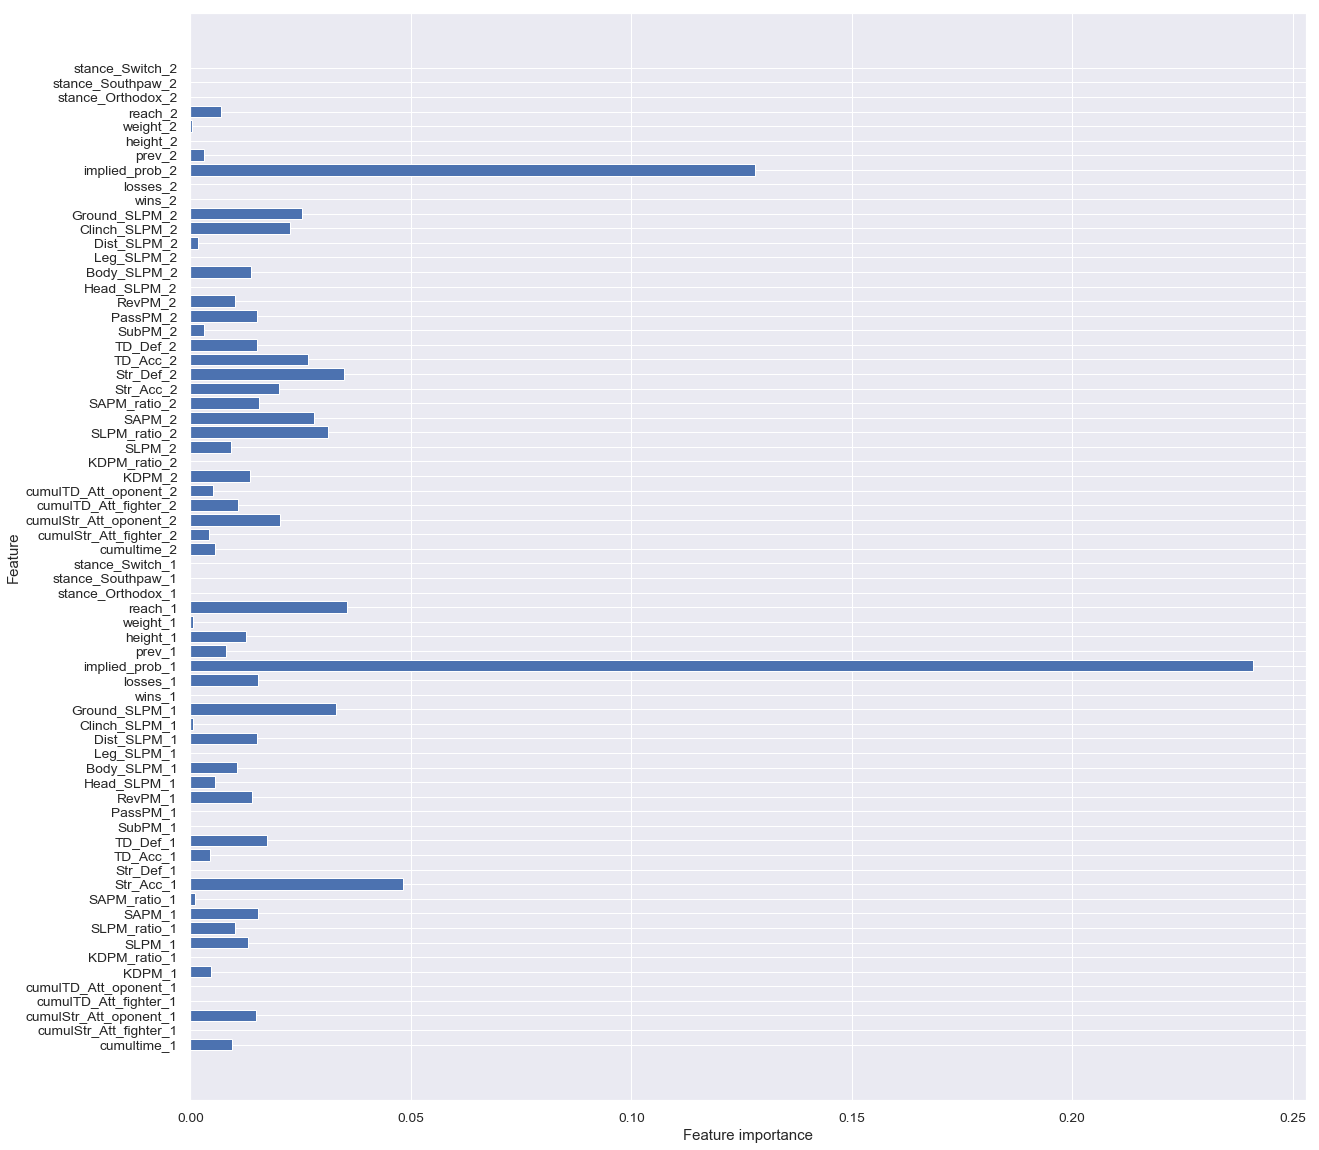

In [102]:
#importance of features
plot_feature_importances(forest2)

# XGBoost